In [1]:
# # !pip install pandas openpyx
# # !pip install pandas
# !pip install matplotlib
# !pip install numpy
# !pip install seaborn
# !pip install plotly
# !pip install scikit-learn

In [ ]:
# !pip install xgboost
# !pip install imbalanced-learn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder
from datetime import datetime, timedelta
import openpyxl
import xgboost as xgb


In [2]:
df = pd.read_excel("C:/Users/viren/OneDrive/Desktop/IIT-MADARAS(GUVI)/Industrial Copper Modeling/Copper_Set.xlsx")

In [3]:
df

id   item_date quantity tons  \
0       EC06F063-9DF0-440C-8764-0B0C05A4F6AE  20210401.0     54.151139   
1       4E5F4B3D-DDDF-499D-AFDE-A3227EC49425  20210401.0    768.024839   
2       E140FF1B-2407-4C02-A0DD-780A093B1158  20210401.0    386.127949   
3       F8D507A0-9C62-4EFE-831E-33E1DA53BB50  20210401.0    202.411065   
4       4E1C4E78-152B-430A-8094-ADD889C9D0AD  20210401.0    785.526262   
...                                      ...         ...           ...   
181668  DE633116-D1DF-4846-982E-55EFC3658A76  20200702.0    102.482422   
181669  A48374B1-E6DB-45F2-889A-1F9C27C099EB  20200702.0    208.086469   
181670  91643238-5C7B-4237-9A5F-63AE3D35F320  20200702.0      4.235594   
181671  7AFFD323-01D9-4E15-B80D-7D1B03498FC8  20200702.0         -2000   
181672  AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC  20200702.0    406.686538   

          customer  country status item type  application  thickness   width  \
0       30156308.0     28.0    Won         W         10.0       2.00  1500.0   
1       30202938.0     25.0    Won         W         41.0       0.80  1210.0   
2       30153963.0     30.0    Won        WI         28.0       0.38   952.0   
3       30349574.0     32.0    Won         S         59.0       2.30  1317.0   
4       30211560.0     28.0    Won         W         10.0       4.00  2000.0   
...            ...      ...    ...       ...          ...        ...     ...   
181668  30200854.0     25.0    Won         W         41.0       0.96  1220.0   
181669  30200854.0     25.0    Won         W         41.0       0.95  1500.0   
181670  30200854.0     25.0    Won         W         41.0       0.71  1250.0   
181671  30200854.0     25.0    Won         W         41.0       0.85  1250.0   
181672  30200854.0     25.0    Won         W         41.0       0.71  1240.0   

                                    material_ref  product_ref  delivery date  \
0                                    DEQ1 S460MC   1670798778     20210701.0   
1       0000000000000000000000000000000000104991   1668701718     20210401.0   
2                                       S0380700       628377     20210101.0   
3                        DX51D+ZM310MAO 2.3X1317   1668701718     20210101.0   
4                                2_S275JR+AR-CL1       640665     20210301.0   
...                                          ...          ...            ...   
181668  0000000000000000000000000000000001000777    164141591     20200701.0   
181669  0000000000000000000000000000000001000227    164141591     20200701.0   
181670  0000000000000000000000000000000001004216    164141591     20200701.0   
181671  0000000000000000000000000000000001001149    164141591     20200701.0   
181672  0000000000000000000000000000000001005439    164141591     20200701.0   

        selling_price  
0              854.00  
1             1047.00  
2              644.33  
3              768.00  
4              577.00  
...               ...  
181668         591.00  
181669         589.00  
181670         619.00  
181671         601.00  
181672         607.00  

[181673 rows x 14 columns]

In [4]:
# verify the number of unique value in each features
for i in list(df.columns):
    print(f"{i}: {df[i].nunique()}")

id: 181671
item_date: 252
quantity tons: 181673
customer: 1169
country: 17
status: 9
item type: 7
application: 30
thickness: 594
width: 1386
material_ref: 16563
product_ref: 33
delivery date: 28
selling_price: 9795


In [5]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [6]:
# Convert quantity tons to numeric
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

# Ensure dates are treated as strings to avoid float issues
df['item_date_1'] = df['item_date'].astype(str).str.replace('\.0$', '', regex=True)

df['delivery date_1'] = df['delivery date'].astype(str).str.replace('\.0$', '', regex=True)

# Convert to datetime with correct format
df['item_date_1'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery date_1'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')

In [7]:
df.head(3)

id   item_date  quantity tons  \
0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE  20210401.0      54.151139   
1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425  20210401.0     768.024839   
2  E140FF1B-2407-4C02-A0DD-780A093B1158  20210401.0     386.127949   

     customer  country status item type  application  thickness   width  \
0  30156308.0     28.0    Won         W         10.0       2.00  1500.0   
1  30202938.0     25.0    Won         W         41.0       0.80  1210.0   
2  30153963.0     30.0    Won        WI         28.0       0.38   952.0   

                               material_ref  product_ref  delivery date  \
0                               DEQ1 S460MC   1670798778     20210701.0   
1  0000000000000000000000000000000000104991   1668701718     20210401.0   
2                                  S0380700       628377     20210101.0   

   selling_price item_date_1 delivery date_1  
0         854.00  2021-04-01      2021-07-01  
1        1047.00  2021-04-01      2021-04-01  
2         644.33  2021-04-01      2021-01-01

In [8]:
df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery date_1        3
dtype: int64

In [9]:
# Verify NaN values in 'Material_reference' after replacement in % 
print(np.round(df['material_ref'].isnull().mean()*100, 5),"% of missing values")

42.8897 % of missing values


In [10]:
df.drop(columns=['id', 'material_ref'], inplace=True)
df

item_date  quantity tons    customer  country status item type  \
0       20210401.0      54.151139  30156308.0     28.0    Won         W   
1       20210401.0     768.024839  30202938.0     25.0    Won         W   
2       20210401.0     386.127949  30153963.0     30.0    Won        WI   
3       20210401.0     202.411065  30349574.0     32.0    Won         S   
4       20210401.0     785.526262  30211560.0     28.0    Won         W   
...            ...            ...         ...      ...    ...       ...   
181668  20200702.0     102.482422  30200854.0     25.0    Won         W   
181669  20200702.0     208.086469  30200854.0     25.0    Won         W   
181670  20200702.0       4.235594  30200854.0     25.0    Won         W   
181671  20200702.0   -2000.000000  30200854.0     25.0    Won         W   
181672  20200702.0     406.686538  30200854.0     25.0    Won         W   

        application  thickness   width  product_ref  delivery date  \
0              10.0       2.00  1500.0   1670798778     20210701.0   
1              41.0       0.80  1210.0   1668701718     20210401.0   
2              28.0       0.38   952.0       628377     20210101.0   
3              59.0       2.30  1317.0   1668701718     20210101.0   
4              10.0       4.00  2000.0       640665     20210301.0   
...             ...        ...     ...          ...            ...   
181668         41.0       0.96  1220.0    164141591     20200701.0   
181669         41.0       0.95  1500.0    164141591     20200701.0   
181670         41.0       0.71  1250.0    164141591     20200701.0   
181671         41.0       0.85  1250.0    164141591     20200701.0   
181672         41.0       0.71  1240.0    164141591     20200701.0   

        selling_price item_date_1 delivery date_1  
0              854.00  2021-04-01      2021-07-01  
1             1047.00  2021-04-01      2021-04-01  
2              644.33  2021-04-01      2021-01-01  
3              768.00  2021-04-01      2021-01-01  
4              577.00  2021-04-01      2021-03-01  
...               ...         ...             ...  
181668         591.00  2020-07-02      2020-07-01  
181669         589.00  2020-07-02      2020-07-01  
181670         619.00  2020-07-02      2020-07-01  
181671         601.00  2020-07-02      2020-07-01  
181672         607.00  2020-07-02      2020-07-01  

[181673 rows x 14 columns]

In [11]:
df.describe().T

count                           mean                  min  \
item_date        181672.0                20204588.226947           19950000.0   
quantity tons    181672.0                    5874.925754              -2000.0   
customer         181672.0                30512209.027968              12458.0   
country          181645.0                      44.893022                 25.0   
application      181649.0                      25.615809                  2.0   
thickness        181672.0                       2.564827                 0.18   
width            181673.0                    1295.286724                  1.0   
product_ref      181673.0               473967910.724318             611728.0   
delivery date    181672.0                20207381.557934           20190401.0   
selling_price    181672.0                    1918.035505              -1160.0   
item_date_1        181670  2020-11-26 22:56:58.127374080  2020-07-02 00:00:00   
delivery date_1    181670  2021-01-25 22:44:26.223372032  2019-04-01 00:00:00   

                                 25%                  50%  \
item_date                 20200929.0           20201130.0   
quantity tons              10.970298            30.364635   
customer                  30196884.0           30205242.0   
country                         26.0                 30.0   
application                     10.0                 15.0   
thickness                        0.7                  1.5   
width                         1180.0               1250.0   
product_ref                 611993.0             640665.0   
delivery date             20201101.0           20210101.0   
selling_price                  669.0                812.0   
item_date_1      2020-09-29 00:00:00  2020-11-30 00:00:00   
delivery date_1  2020-11-01 00:00:00  2021-01-01 00:00:00   

                                 75%                  max               std  
item_date                 20210203.0           20210401.0       4551.119094  
quantity tons              67.160612         1000000000.0    2349081.241674  
customer                  30280416.0         2147483647.0   24333815.584025  
country                         78.0                113.0         24.404214  
application                     41.0                 99.0         17.754175  
thickness                        3.0               2500.0          6.572321  
width                         1500.0               2990.0        261.631754  
product_ref             1332077137.0         1722207579.0  717510064.710402  
delivery date             20210401.0           30310101.0      24110.589486  
selling_price                  953.0          100001015.0     331795.642555  
item_date_1      2021-02-03 00:00:00  2021-04-01 00:00:00               NaN  
delivery date_1  2021-04-01 00:00:00  2022-01-01 00:00:00               NaN

In [12]:
# Quantity tons and selling price values are not below 0. so we convert to null below 0 values.

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T

count                           mean                  min  \
item_date        181672.0                20204588.226947           19950000.0   
quantity tons    181668.0                    5875.066247              0.00001   
customer         181672.0                30512209.027968              12458.0   
country          181645.0                      44.893022                 25.0   
application      181649.0                      25.615809                  2.0   
thickness        181672.0                       2.564827                 0.18   
width            181673.0                    1295.286724                  1.0   
product_ref      181673.0               473967910.724318             611728.0   
delivery date    181672.0                20207381.557934           20190401.0   
selling_price    181665.0                    1918.124252                  0.1   
item_date_1        181670  2020-11-26 22:56:58.127374080  2020-07-02 00:00:00   
delivery date_1    181670  2021-01-25 22:44:26.223372032  2019-04-01 00:00:00   

                                 25%                  50%  \
item_date                 20200929.0           20201130.0   
quantity tons              10.971217            30.365013   
customer                  30196884.0           30205242.0   
country                         26.0                 30.0   
application                     10.0                 15.0   
thickness                        0.7                  1.5   
width                         1180.0               1250.0   
product_ref                 611993.0             640665.0   
delivery date             20201101.0           20210101.0   
selling_price                  669.0                812.0   
item_date_1      2020-09-29 00:00:00  2020-11-30 00:00:00   
delivery date_1  2020-11-01 00:00:00  2021-01-01 00:00:00   

                                 75%                  max               std  
item_date                 20210203.0           20210401.0       4551.119094  
quantity tons              67.161335         1000000000.0    2349107.102735  
customer                  30280416.0         2147483647.0   24333815.584025  
country                         78.0                113.0         24.404214  
application                     41.0                 99.0         17.754175  
thickness                        3.0               2500.0          6.572321  
width                         1500.0               2990.0        261.631754  
product_ref             1332077137.0         1722207579.0  717510064.710402  
delivery date             20210401.0           30310101.0      24110.589486  
selling_price                  953.0          100001015.0     331802.034663  
item_date_1      2021-02-03 00:00:00  2021-04-01 00:00:00               NaN  
delivery date_1  2021-04-01 00:00:00  2022-01-01 00:00:00               NaN

In [13]:
# Checking the null values in this dataFrame:
df.isnull().sum()

item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery date_1     3
dtype: int64

In [14]:
df.dtypes

item_date                 float64
quantity tons             float64
customer                  float64
country                   float64
status                     object
item type                  object
application               float64
thickness                 float64
width                     float64
product_ref                 int64
delivery date             float64
selling_price             float64
item_date_1        datetime64[ns]
delivery date_1    datetime64[ns]
dtype: object

In [15]:
# Handling null values using median and mode
# identifying the object and numerical columns
object_columns = ['item_date','item_date_1','delivery date','delivery date_1','status']
numerical_columns = ['quantity tons','customer','country','application','thickness','selling_price']

In [16]:
# median - middle value in dataset (asc/desc), mode - value that appears most freqently in dataset
# Fill missing values in object columns with mode
for col in object_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# fill missing values in numerical columns with median
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)
df.isna().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

In [17]:
# Chicking for the unique values of all the columns:

for i in df.columns:
    print(i,":",df[i].nunique())

item_date : 252
quantity tons : 181669
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
product_ref : 33
delivery date : 28
selling_price : 9789
item_date_1 : 250
delivery date_1 : 26


In [18]:
for col in ['country','status','item type','application']:
    print(col,df[col].unique())
    print('--'*20)

country [ 28.  25.  30.  32.  38.  78.  27.  77. 113.  79.  26.  39.  40.  84.
  80. 107.  89.]
----------------------------------------
status ['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
----------------------------------------
item type ['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
----------------------------------------
application [10. 41. 28. 59. 15.  4. 38. 56. 42. 26. 27. 19. 20. 66. 29. 22. 40. 25.
 67. 79.  3. 99.  2.  5. 39. 69. 70. 65. 58. 68.]
----------------------------------------


In [19]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [20]:
for col in ['status','item type']:
    print(df[col].value_counts())
    print('--'*20)
    

status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64
----------------------------------------
item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64
----------------------------------------


In [21]:
df['status'] = df['status'].str.strip()

In [22]:
# Convertca tegorical columns to numerical using OrdinalEncoder and using map method.
df['status'] = df['status'].map({'Lost': 0,'Won': 1,'Draft': 2,'To be approved': 3,
                                  'Not lost for AM': 4,'Wonderful': 5,'Revised': 6,'Offered': 7,'Offerable': 8})


df.head(3)

item_date  quantity tons    customer  country  status item type  \
0  20210401.0      54.151139  30156308.0     28.0       1         W   
1  20210401.0     768.024839  30202938.0     25.0       1         W   
2  20210401.0     386.127949  30153963.0     30.0       1        WI   

   application  thickness   width  product_ref  delivery date  selling_price  \
0         10.0       2.00  1500.0   1670798778     20210701.0         854.00   
1         41.0       0.80  1210.0   1668701718     20210401.0        1047.00   
2         28.0       0.38   952.0       628377     20210101.0         644.33   

  item_date_1 delivery date_1  
0  2021-04-01      2021-07-01  
1  2021-04-01      2021-04-01  
2  2021-04-01      2021-01-01

In [23]:
df['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8])

In [24]:
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])

df['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [26]:
df['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8])

# Skewness Handling - Feature Scaling(Log Transformation)

In [29]:
# Find outliers - box plot & skewes data - hist plot and violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin plot for {column}')
    plt.show()

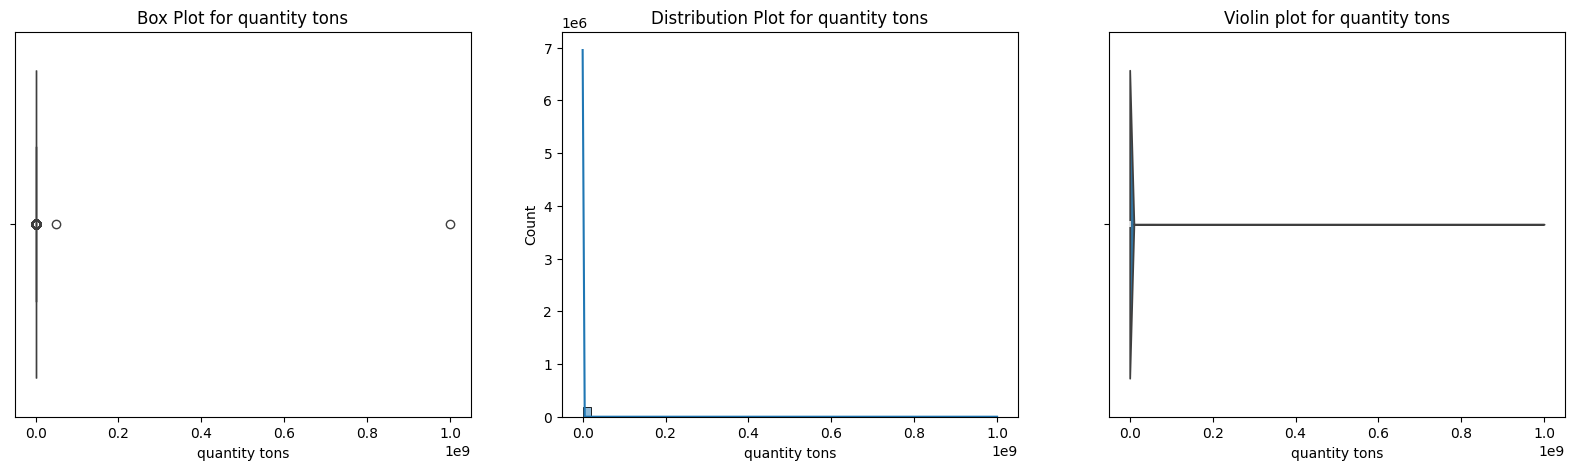

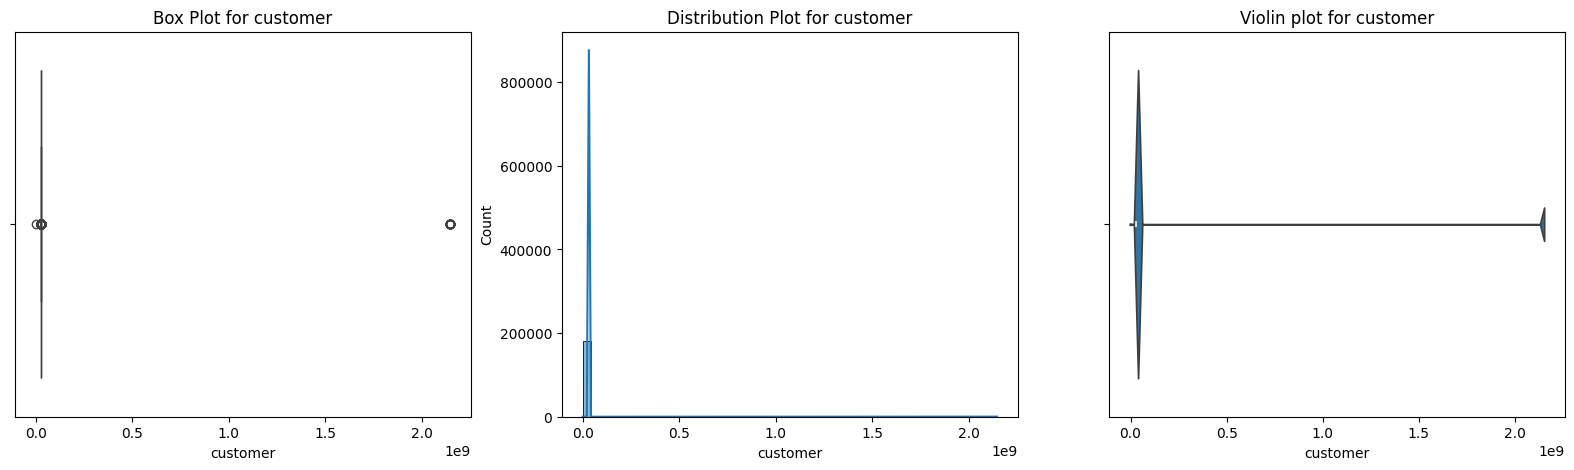

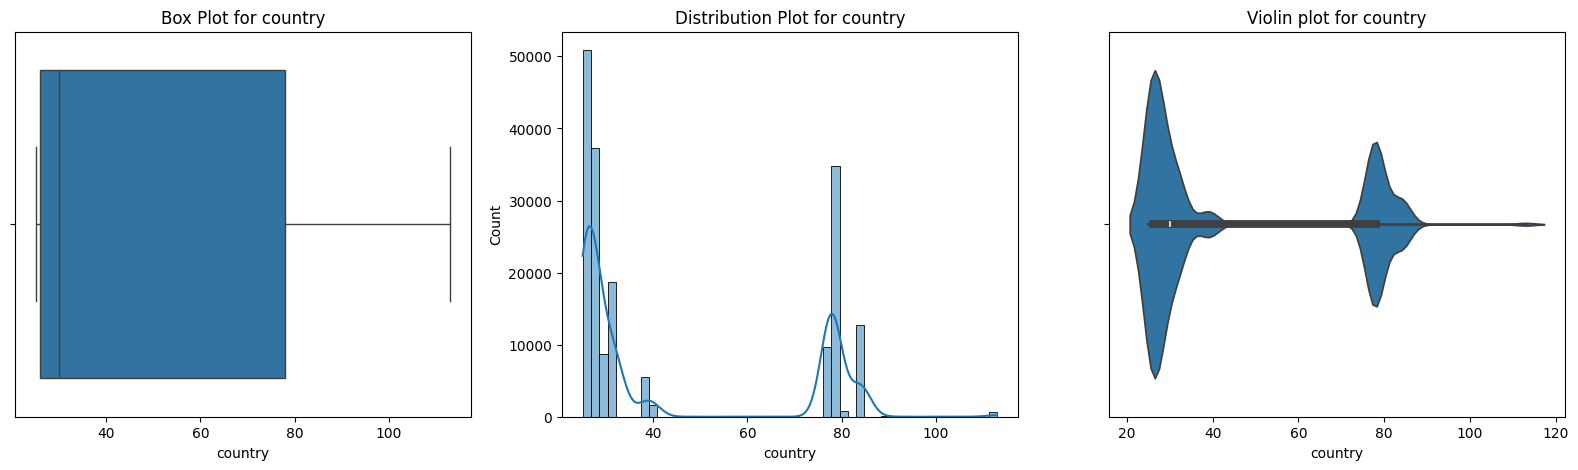

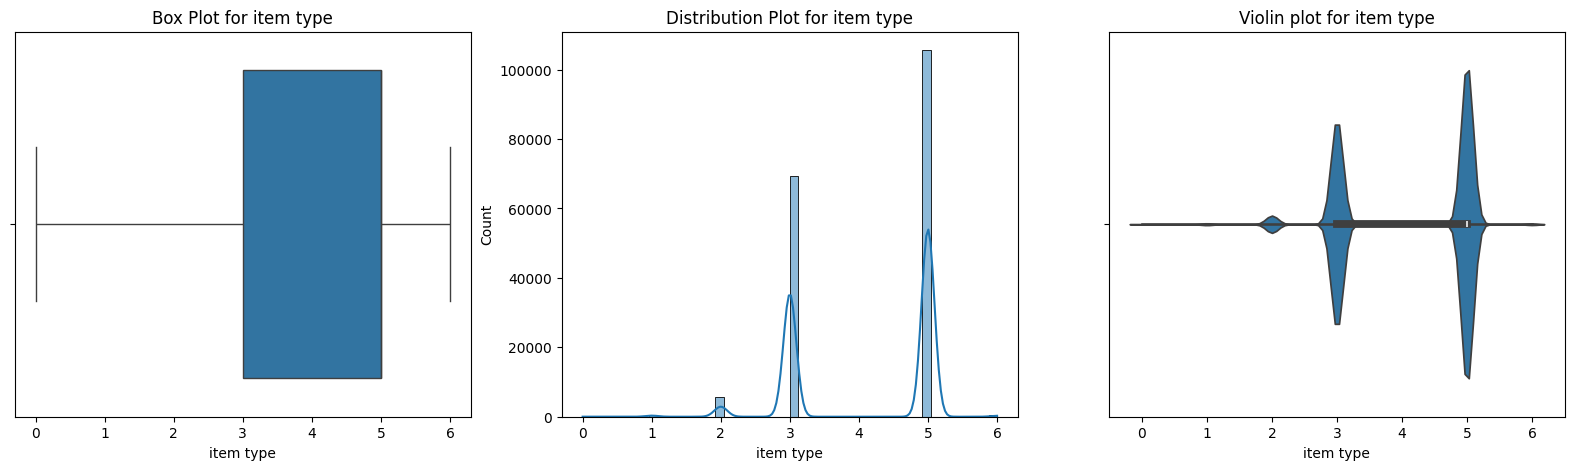

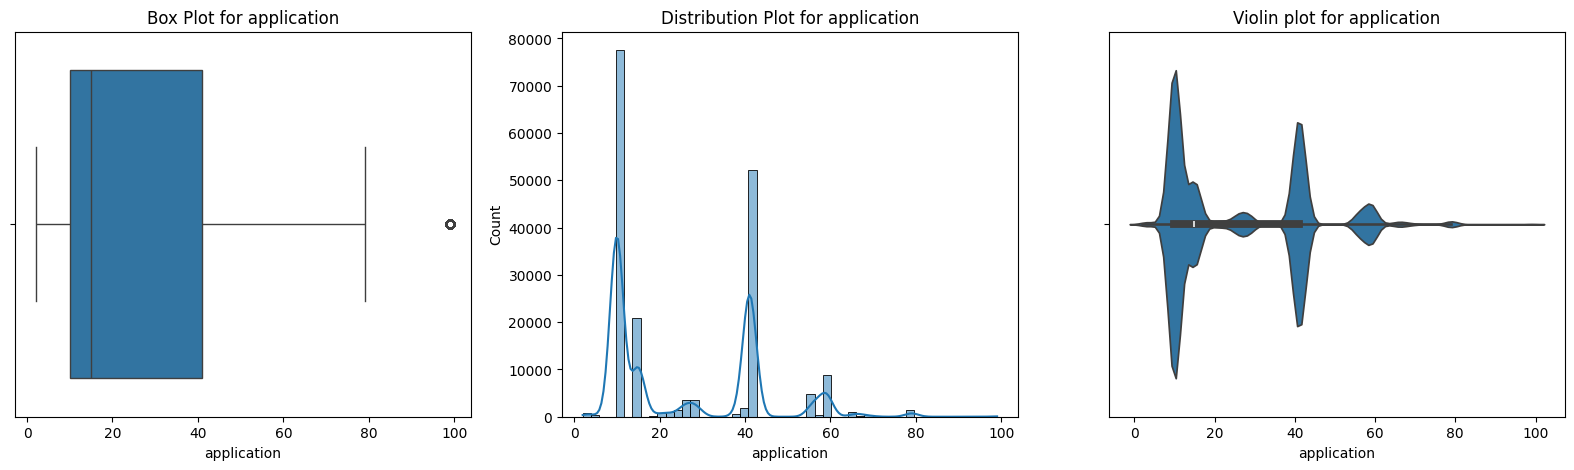

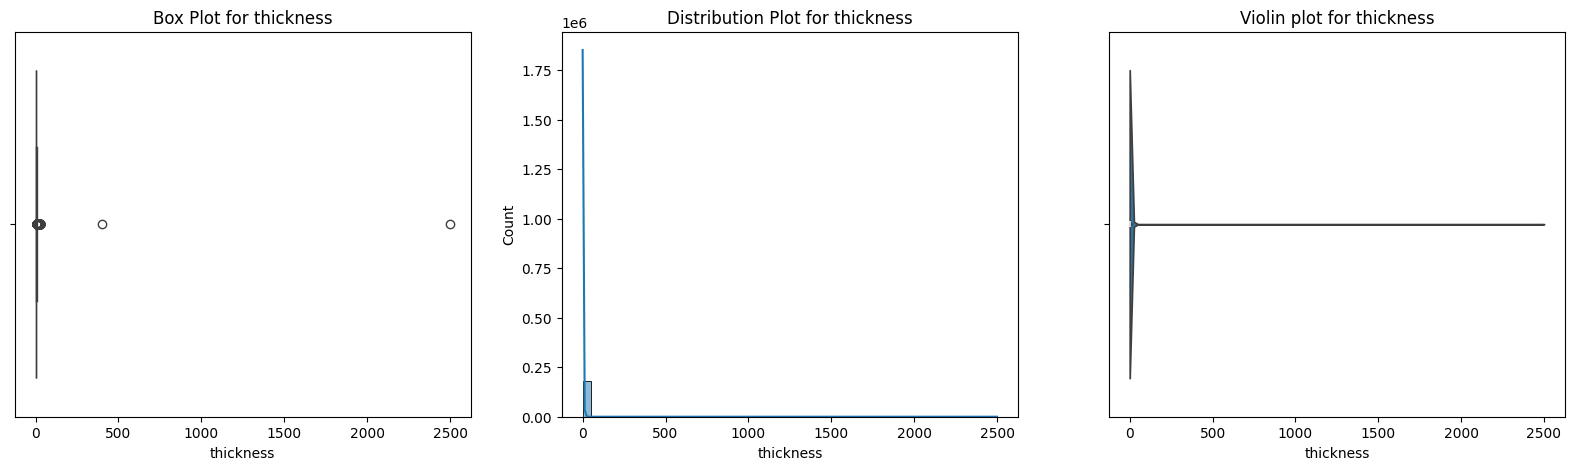

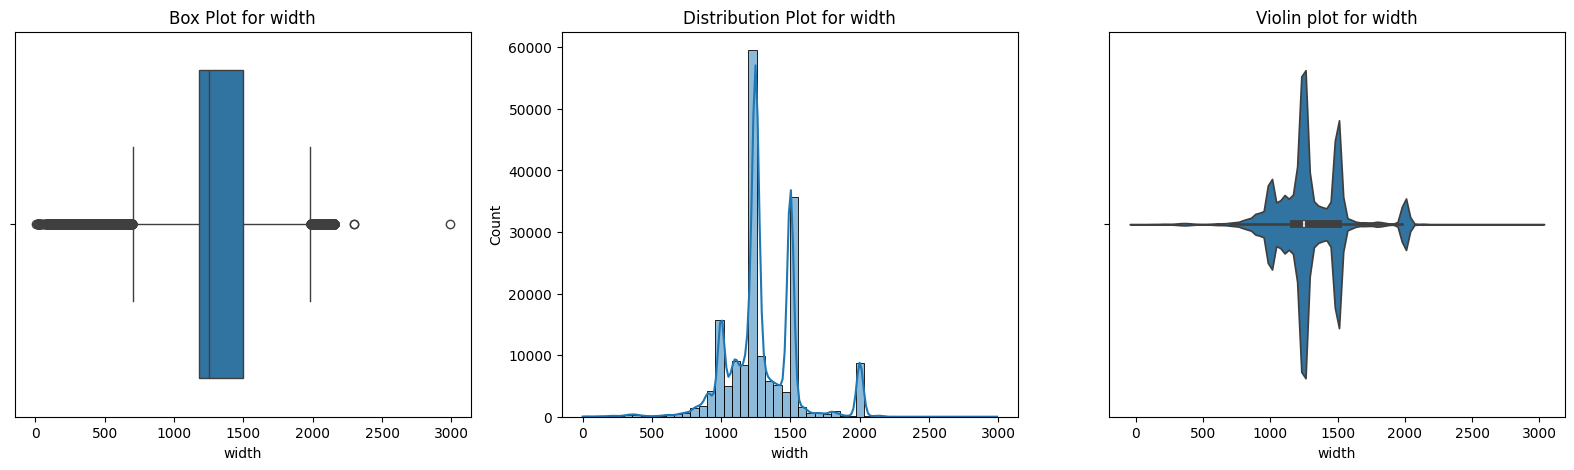

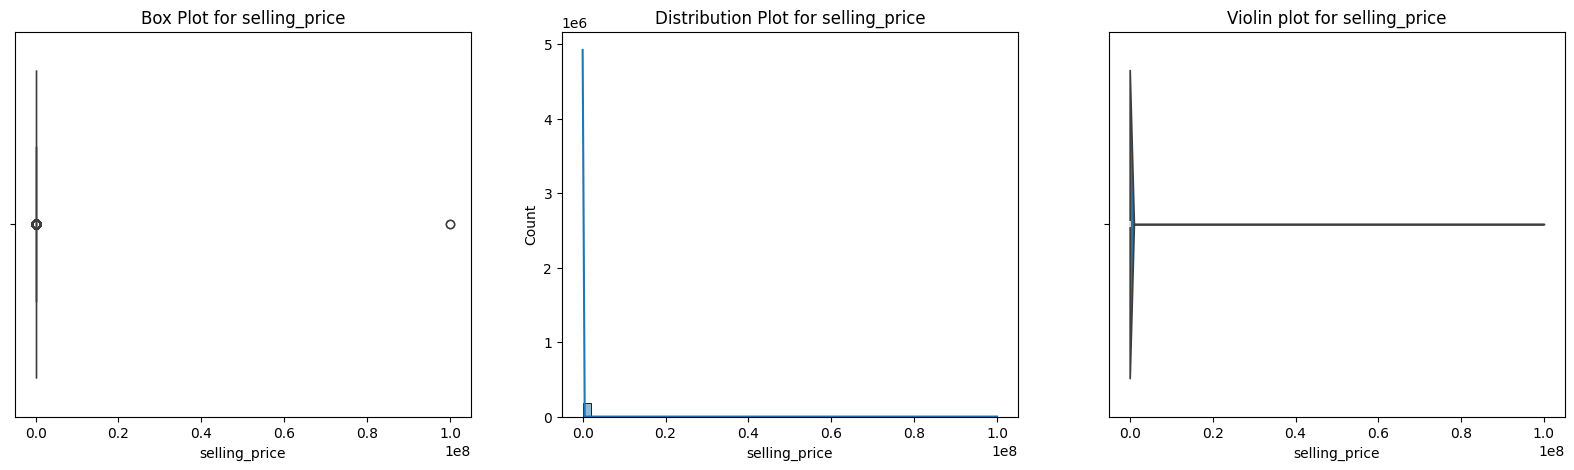

In [32]:
for i in ['quantity tons','customer','country','item type','application','thickness','width', 'selling_price']:
    plot(df, i)

In [35]:
# quantity tons, thickness and selling price data are skewed, so we will apply log transformation to these columns.
df1 = df.copy()
df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1

item_date  quantity tons    customer  country  status  item type  \
0       20210401.0      54.151139  30156308.0     28.0       1        5.0   
1       20210401.0     768.024839  30202938.0     25.0       1        5.0   
2       20210401.0     386.127949  30153963.0     30.0       1        6.0   
3       20210401.0     202.411065  30349574.0     32.0       1        3.0   
4       20210401.0     785.526262  30211560.0     28.0       1        5.0   
...            ...            ...         ...      ...     ...        ...   
181668  20200702.0     102.482422  30200854.0     25.0       1        5.0   
181669  20200702.0     208.086469  30200854.0     25.0       1        5.0   
181670  20200702.0       4.235594  30200854.0     25.0       1        5.0   
181671  20200702.0      30.365013  30200854.0     25.0       1        5.0   
181672  20200702.0     406.686538  30200854.0     25.0       1        5.0   

        application  thickness   width  product_ref  delivery date  \
0              10.0       2.00  1500.0   1670798778     20210701.0   
1              41.0       0.80  1210.0   1668701718     20210401.0   
2              28.0       0.38   952.0       628377     20210101.0   
3              59.0       2.30  1317.0   1668701718     20210101.0   
4              10.0       4.00  2000.0       640665     20210301.0   
...             ...        ...     ...          ...            ...   
181668         41.0       0.96  1220.0    164141591     20200701.0   
181669         41.0       0.95  1500.0    164141591     20200701.0   
181670         41.0       0.71  1250.0    164141591     20200701.0   
181671         41.0       0.85  1250.0    164141591     20200701.0   
181672         41.0       0.71  1240.0    164141591     20200701.0   

        selling_price item_date_1 delivery date_1  quantity tons_log  \
0              854.00  2021-04-01      2021-07-01           3.991779   
1             1047.00  2021-04-01      2021-04-01           6.643822   
2              644.33  2021-04-01      2021-01-01           5.956169   
3              768.00  2021-04-01      2021-01-01           5.310301   
4              577.00  2021-04-01      2021-03-01           6.666354   
...               ...         ...             ...                ...   
181668         591.00  2020-07-02      2020-07-01           4.629691   
181669         589.00  2020-07-02      2020-07-01           5.337954   
181670         619.00  2020-07-02      2020-07-01           1.443523   
181671         601.00  2020-07-02      2020-07-01           3.413291   
181672         607.00  2020-07-02      2020-07-01           6.008043   

        thickness_log  selling_price_log  
0            0.693147           6.749931  
1           -0.223144           6.953684  
2           -0.967584           6.468211  
3            0.832909           6.643790  
4            1.386294           6.357842  
...               ...                ...  
181668      -0.040822           6.381816  
181669      -0.051293           6.378426  
181670      -0.342490           6.428105  
181671      -0.162519           6.398595  
181672      -0.342490           6.408529  

[181673 rows x 17 columns]

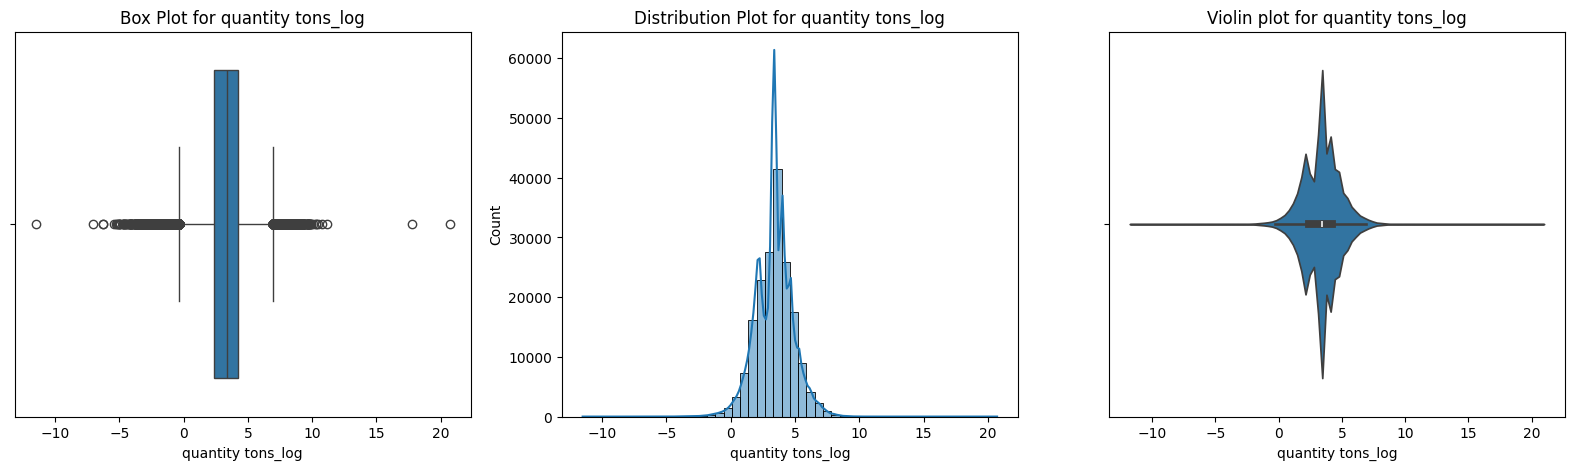

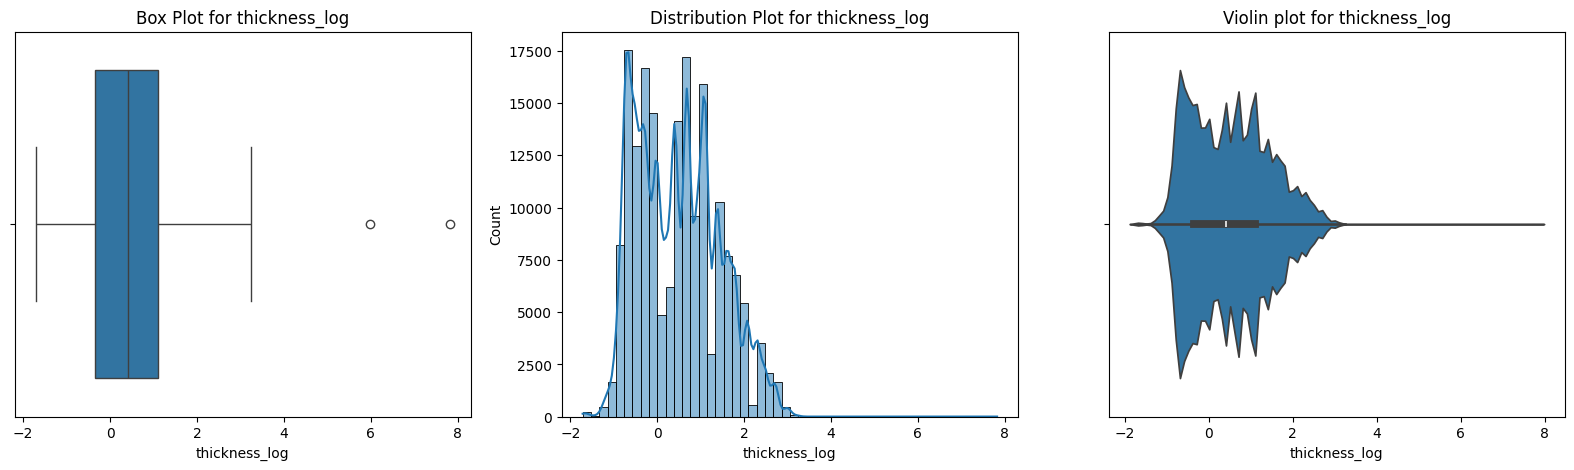

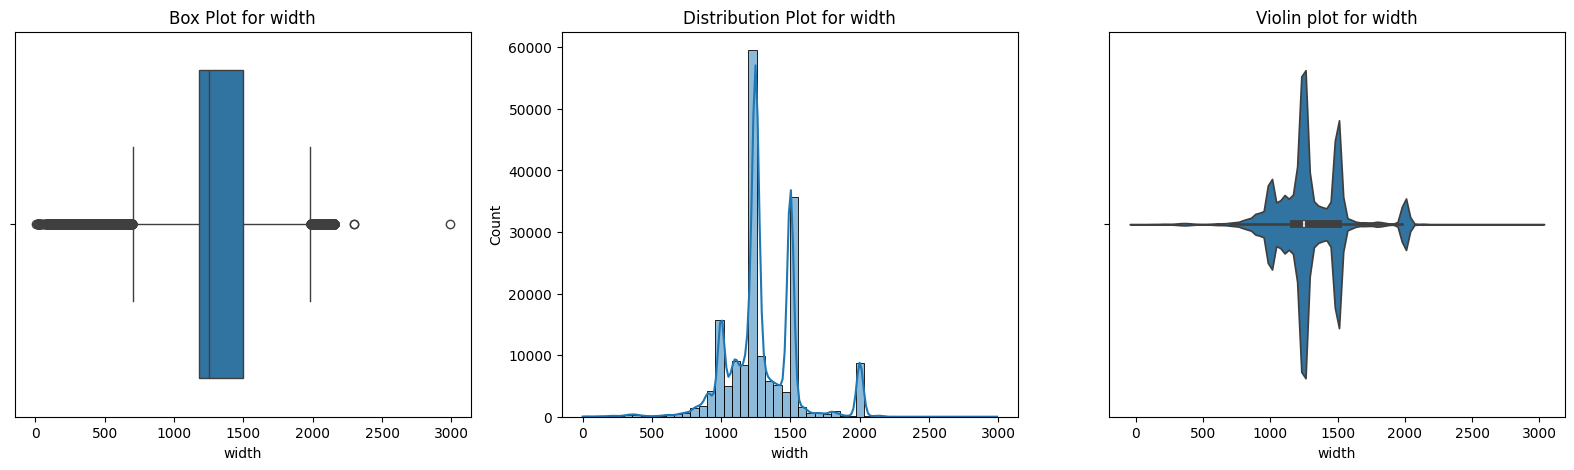

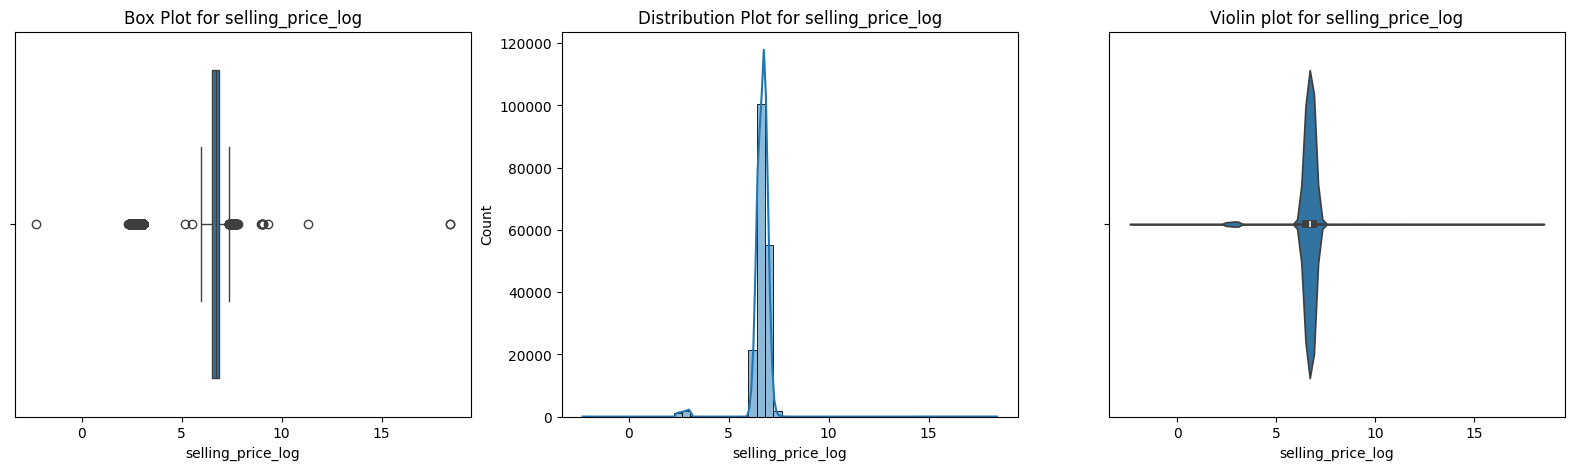

In [36]:
# after log transformation the data are normally distributed and reduced the skewness. [hist plot and violin plot]
for i in ['quantity tons_log','thickness_log','width', 'selling_price_log']:
    plot(df1, i)

# Outleries Handling - InterquartileR ange (IQR) method

In [37]:
df2 = df1.copy()
df2

item_date  quantity tons    customer  country  status  item type  \
0       20210401.0      54.151139  30156308.0     28.0       1        5.0   
1       20210401.0     768.024839  30202938.0     25.0       1        5.0   
2       20210401.0     386.127949  30153963.0     30.0       1        6.0   
3       20210401.0     202.411065  30349574.0     32.0       1        3.0   
4       20210401.0     785.526262  30211560.0     28.0       1        5.0   
...            ...            ...         ...      ...     ...        ...   
181668  20200702.0     102.482422  30200854.0     25.0       1        5.0   
181669  20200702.0     208.086469  30200854.0     25.0       1        5.0   
181670  20200702.0       4.235594  30200854.0     25.0       1        5.0   
181671  20200702.0      30.365013  30200854.0     25.0       1        5.0   
181672  20200702.0     406.686538  30200854.0     25.0       1        5.0   

        application  thickness   width  product_ref  delivery date  \
0              10.0       2.00  1500.0   1670798778     20210701.0   
1              41.0       0.80  1210.0   1668701718     20210401.0   
2              28.0       0.38   952.0       628377     20210101.0   
3              59.0       2.30  1317.0   1668701718     20210101.0   
4              10.0       4.00  2000.0       640665     20210301.0   
...             ...        ...     ...          ...            ...   
181668         41.0       0.96  1220.0    164141591     20200701.0   
181669         41.0       0.95  1500.0    164141591     20200701.0   
181670         41.0       0.71  1250.0    164141591     20200701.0   
181671         41.0       0.85  1250.0    164141591     20200701.0   
181672         41.0       0.71  1240.0    164141591     20200701.0   

        selling_price item_date_1 delivery date_1  quantity tons_log  \
0              854.00  2021-04-01      2021-07-01           3.991779   
1             1047.00  2021-04-01      2021-04-01           6.643822   
2              644.33  2021-04-01      2021-01-01           5.956169   
3              768.00  2021-04-01      2021-01-01           5.310301   
4              577.00  2021-04-01      2021-03-01           6.666354   
...               ...         ...             ...                ...   
181668         591.00  2020-07-02      2020-07-01           4.629691   
181669         589.00  2020-07-02      2020-07-01           5.337954   
181670         619.00  2020-07-02      2020-07-01           1.443523   
181671         601.00  2020-07-02      2020-07-01           3.413291   
181672         607.00  2020-07-02      2020-07-01           6.008043   

        thickness_log  selling_price_log  
0            0.693147           6.749931  
1           -0.223144           6.953684  
2           -0.967584           6.468211  
3            0.832909           6.643790  
4            1.386294           6.357842  
...               ...                ...  
181668      -0.040822           6.381816  
181669      -0.051293           6.378426  
181670      -0.342490           6.428105  
181671      -0.162519           6.398595  
181672      -0.342490           6.408529  

[181673 rows x 17 columns]

In [50]:
# Using IQR and clip() methods to handle outliers and add a new column of DataFrame

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_threshold = df[column].quantile(0.25) - 1.5 * iqr
    upper_threshold = df[column].quantile(0.75) + 1.5 * iqr
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    

In [51]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# aboveu  pper threshold values (>20) are converted tou peer threshold value (20) in features
# below lower threshold values (<5) are converted to lower threshold value (5) in features

outlier(df2,'quantity tons_log')
outlier(df2,'thickness_log')
outlier(df2,'selling_price_log')
outlier(df2,'width')
df2


item_date  quantity tons    customer  country  status  item type  \
0       20210401.0      54.151139  30156308.0     28.0       1        5.0   
1       20210401.0     768.024839  30202938.0     25.0       1        5.0   
2       20210401.0     386.127949  30153963.0     30.0       1        6.0   
3       20210401.0     202.411065  30349574.0     32.0       1        3.0   
4       20210401.0     785.526262  30211560.0     28.0       1        5.0   
...            ...            ...         ...      ...     ...        ...   
181668  20200702.0     102.482422  30200854.0     25.0       1        5.0   
181669  20200702.0     208.086469  30200854.0     25.0       1        5.0   
181670  20200702.0       4.235594  30200854.0     25.0       1        5.0   
181671  20200702.0      30.365013  30200854.0     25.0       1        5.0   
181672  20200702.0     406.686538  30200854.0     25.0       1        5.0   

        application  thickness   width  product_ref  ...  selling_price  \
0              10.0       2.00  1500.0   1670798778  ...         854.00   
1              41.0       0.80  1210.0   1668701718  ...        1047.00   
2              28.0       0.38   952.0       628377  ...         644.33   
3              59.0       2.30  1317.0   1668701718  ...         768.00   
4              10.0       4.00  1980.0       640665  ...         577.00   
...             ...        ...     ...          ...  ...            ...   
181668         41.0       0.96  1220.0    164141591  ...         591.00   
181669         41.0       0.95  1500.0    164141591  ...         589.00   
181670         41.0       0.71  1250.0    164141591  ...         619.00   
181671         41.0       0.85  1250.0    164141591  ...         601.00   
181672         41.0       0.71  1240.0    164141591  ...         607.00   

        item_date_1 delivery date_1 quantity tons_log  thickness_log  \
0        2021-04-01      2021-07-01          3.991779       0.693147   
1        2021-04-01      2021-04-01          6.643822      -0.223144   
2        2021-04-01      2021-01-01          5.956169      -0.967584   
3        2021-04-01      2021-01-01          5.310301       0.832909   
4        2021-04-01      2021-03-01          6.666354       1.386294   
...             ...             ...               ...            ...   
181668   2020-07-02      2020-07-01          4.629691      -0.040822   
181669   2020-07-02      2020-07-01          5.337954      -0.051293   
181670   2020-07-02      2020-07-01          1.443523      -0.342490   
181671   2020-07-02      2020-07-01          3.413291      -0.162519   
181672   2020-07-02      2020-07-01          6.008043      -0.342490   

        selling_price_log  quantity tons_log_outliers  thickness_log_outliers  \
0                6.749931                    3.991779                0.693147   
1                6.953684                    6.643822               -0.223144   
2                6.468211                    5.956169               -0.967584   
3                6.643790                    5.310301                0.832909   
4                6.357842                    6.666354                1.386294   
...                   ...                         ...                     ...   
181668           6.381816                    4.629691               -0.040822   
181669           6.378426                    5.337954               -0.051293   
181670           6.428105                    1.443523               -0.342490   
181671           6.398595                    3.413291               -0.162519   
181672           6.408529                    6.008043               -0.342490   

        selling_price_log_outliers  width_outliers  
0                         6.749931          1500.0  
1                         6.953684          1210.0  
2                         6.468211           952.0  
3                         6.643790          1317.0  
4                         6.357842          1980.0  
...                        

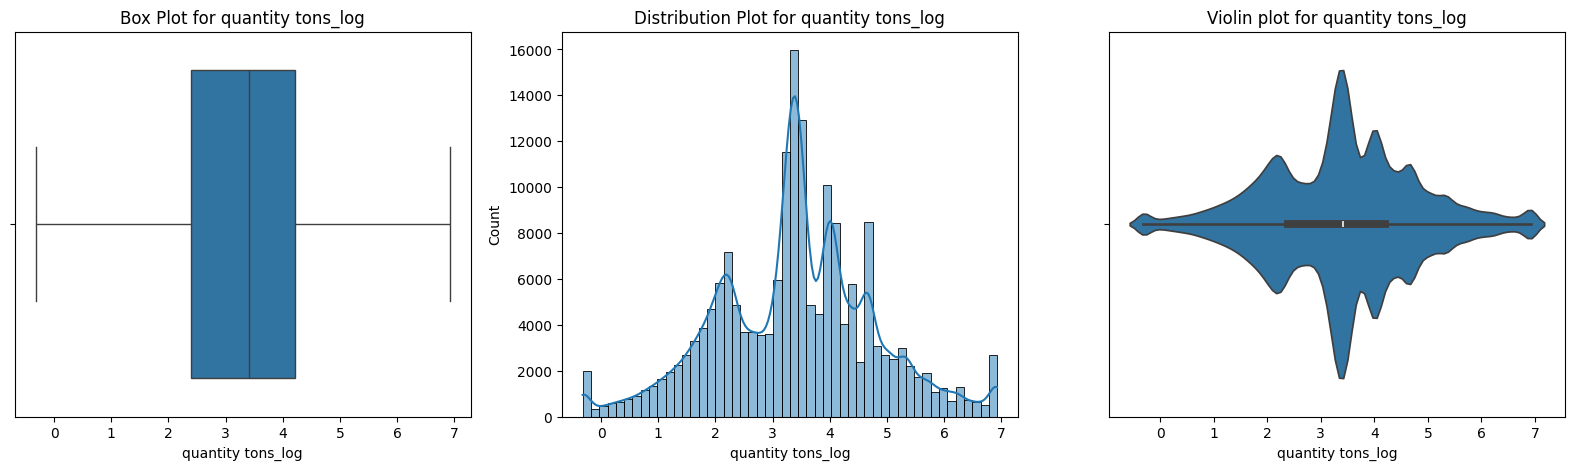

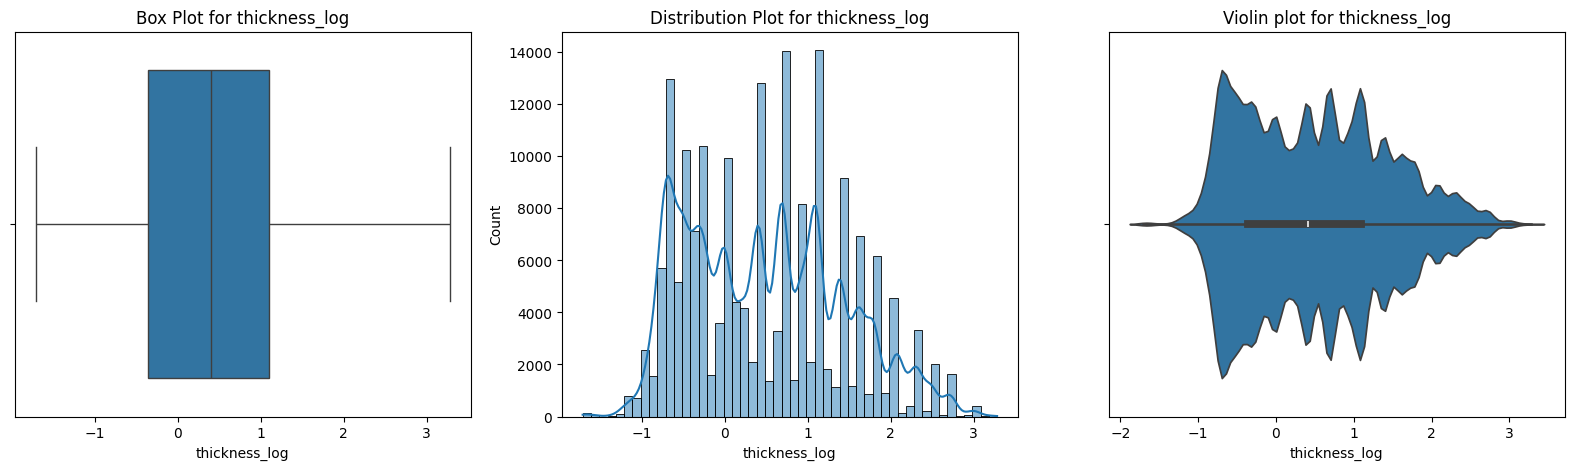

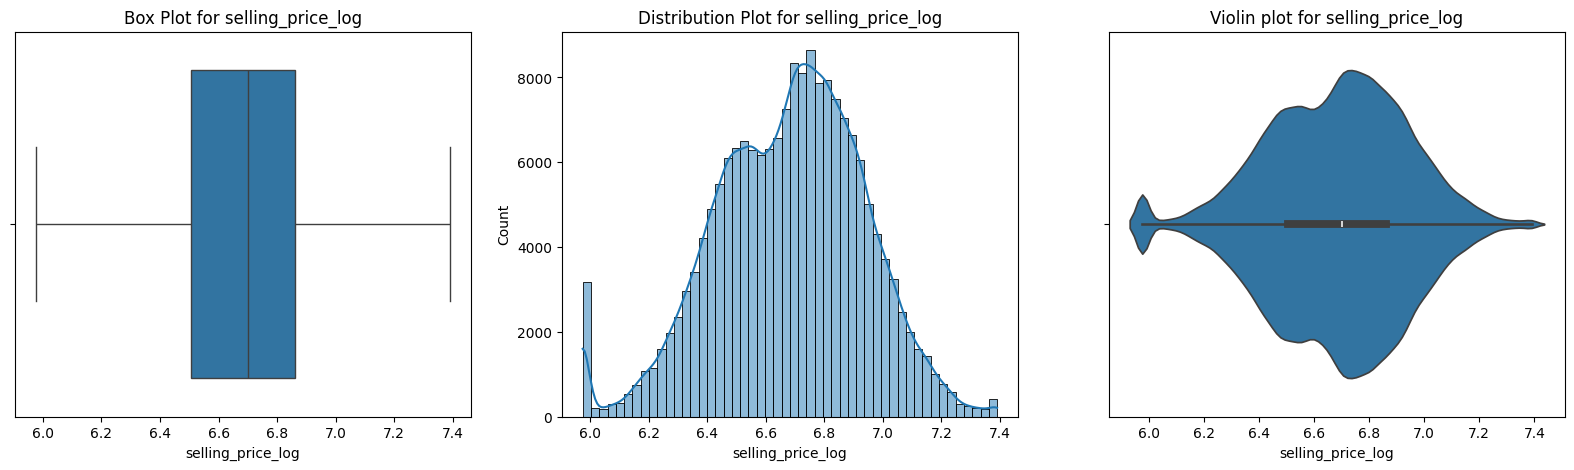

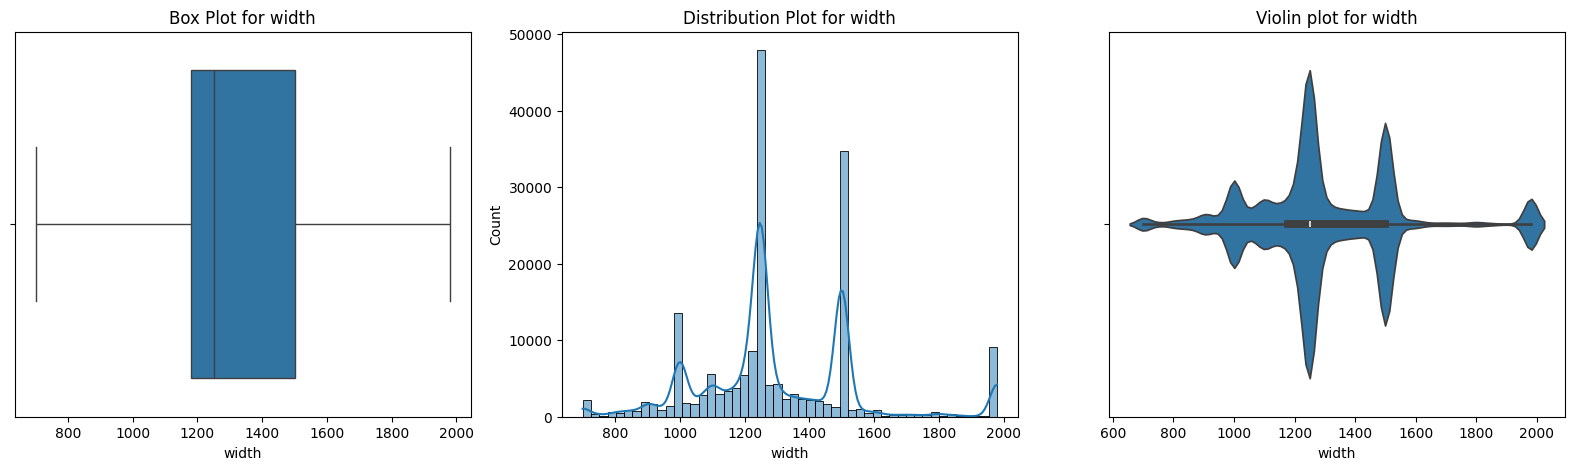

In [46]:
# Transform the outliers to within range using IQR and clip() methods - box plot

for i in ['quantity tons_log','thickness_log','selling_price_log','width']:
    plot(df2, i)

In [47]:
df2.describe().T

count                           mean  \
item_date                   181673.0                20204588.208308   
quantity tons               181673.0                    5874.905389   
customer                    181673.0                  30512207.3383   
country                     181673.0                      44.890727   
status                      181673.0                       1.316684   
item type                   181673.0                       4.133036   
application                 181673.0                      25.614406   
thickness                   181673.0                       2.564822   
width                       181673.0                    1297.045583   
product_ref                 181673.0               473967910.724318   
delivery date               181673.0                20207381.572903   
selling_price               181673.0                    1918.075544   
item_date_1                   181673  2020-11-26 22:57:05.323521024   
delivery date_1               181673  2021-01-25 22:43:50.629757696   
quantity tons_log           181673.0                        3.39295   
thickness_log               181673.0                       0.480332   
selling_price_log           181673.0                       6.680786   
quantity tons_log_outliers  181673.0                        3.39295   
thickness_log_outliers      181673.0                       0.480332   
selling_price_log_outliers  181673.0                       6.680786   
width_outliers              181673.0                    1297.045583   

                                            min                  25%  \
item_date                            19950000.0           20200929.0   
quantity tons                           0.00001            10.971669   
customer                                12458.0           30196884.0   
country                                    25.0                 26.0   
status                                      0.0                  1.0   
item type                                   0.0                  3.0   
application                                 2.0                 10.0   
thickness                                  0.18                  0.7   
width                                     700.0               1180.0   
product_ref                            611728.0             611993.0   
delivery date                        20190401.0           20201101.0   
selling_price                               0.1                669.0   
item_date_1                 2020-07-02 00:00:00  2020-09-29 00:00:00   
delivery date_1             2019-04-01 00:00:00  2020-11-01 00:00:00   
quantity tons_log                     -0.322334             2.395316   
thickness_log                         -1.714798            -0.356675   
selling_price_log                      5.975038             6.505784   
quantity tons_log_outliers            -0.322334             2.395316   
thickness_log_outliers                -1.714798            -0.356675   
selling_price_log_outliers             5.975038             6.505784   
width_outliers                            700.0               1180.0   

                                            50%                  75%  \
item_date                            20201130.0           20210203.0   
quantity tons                         30.365013            67.160385   
customer                             30205242.0           30280416.0   
country                                    30.0                 78.0   
status                                      1.0                  1.0   
item type                                   5.0                  5.0   
application                                15.0                 41.0   
thickness                                   1.5                  3.0   
width                                    1250.0               1500.0   
product_ref                            640665.0         1332077137.0   
delivery date                        20210101.0           20210401.0   
selling_price      

In [48]:
# After add the new columns of 'quantity tons_log', thickness_log','selling_price_log', and 'width', drop the existing columns of 'quantity tons', 'thickness', and 'selling_price' columns.
df3 = df2.drop(columns=['quantity tons', 'thickness', 'selling_price'])
df3

item_date    customer  country  status  item type  application  \
0       20210401.0  30156308.0     28.0       1        5.0         10.0   
1       20210401.0  30202938.0     25.0       1        5.0         41.0   
2       20210401.0  30153963.0     30.0       1        6.0         28.0   
3       20210401.0  30349574.0     32.0       1        3.0         59.0   
4       20210401.0  30211560.0     28.0       1        5.0         10.0   
...            ...         ...      ...     ...        ...          ...   
181668  20200702.0  30200854.0     25.0       1        5.0         41.0   
181669  20200702.0  30200854.0     25.0       1        5.0         41.0   
181670  20200702.0  30200854.0     25.0       1        5.0         41.0   
181671  20200702.0  30200854.0     25.0       1        5.0         41.0   
181672  20200702.0  30200854.0     25.0       1        5.0         41.0   

         width  product_ref  delivery date item_date_1 delivery date_1  \
0       1500.0   1670798778     20210701.0  2021-04-01      2021-07-01   
1       1210.0   1668701718     20210401.0  2021-04-01      2021-04-01   
2        952.0       628377     20210101.0  2021-04-01      2021-01-01   
3       1317.0   1668701718     20210101.0  2021-04-01      2021-01-01   
4       1980.0       640665     20210301.0  2021-04-01      2021-03-01   
...        ...          ...            ...         ...             ...   
181668  1220.0    164141591     20200701.0  2020-07-02      2020-07-01   
181669  1500.0    164141591     20200701.0  2020-07-02      2020-07-01   
181670  1250.0    164141591     20200701.0  2020-07-02      2020-07-01   
181671  1250.0    164141591     20200701.0  2020-07-02      2020-07-01   
181672  1240.0    164141591     20200701.0  2020-07-02      2020-07-01   

        quantity tons_log  thickness_log  selling_price_log  \
0                3.991779       0.693147           6.749931   
1                6.643822      -0.223144           6.953684   
2                5.956169      -0.967584           6.468211   
3                5.310301       0.832909           6.643790   
4                6.666354       1.386294           6.357842   
...                   ...            ...                ...   
181668           4.629691      -0.040822           6.381816   
181669           5.337954      -0.051293           6.378426   
181670           1.443523      -0.342490           6.428105   
181671           3.413291      -0.162519           6.398595   
181672           6.008043      -0.342490           6.408529   

        quantity tons_log_outliers  thickness_log_outliers  \
0                         3.991779                0.693147   
1                         6.643822               -0.223144   
2                         5.956169               -0.967584   
3                         5.310301                0.832909   
4                         6.666354                1.386294   
...                            ...                     ...   
181668                    4.629691               -0.040822   
181669                    5.337954               -0.051293   
181670                    1.443523               -0.342490   
181671                    3.413291               -0.162519   
181672                    6.008043               -0.342490   

        selling_price_log_outliers  width_outliers  
0                         6.749931          1500.0  
1                         6.953684          1210.0  
2                         6.468211           952.0  
3                         6.643790          1317.0  
4                         6.357842          1980.0  
...                            ...             ...  
181668                    6.381816          1220.0  
181669                    6.378426          1500.0  
181670                    6.428105          1250.0  
181671                    6.398595          1250.0  
181672                    6.408529          1240.0  

[181673 rows x 18 columns]

<Axes: >

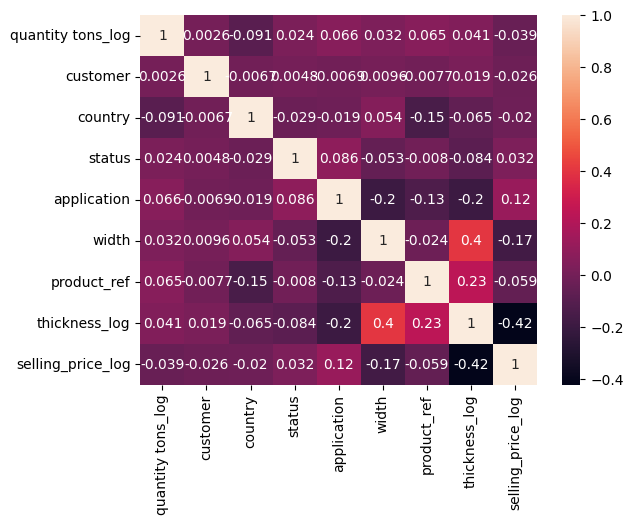

In [53]:
# Need to veryfy any columns are highly correlated using Heatmap. if any columns correlation value >= 0.7 (absolute value), drop the columns

col = ['quantity tons_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']
df_heatmap = df3[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [ ]:
# The highest value is (0.4 or -0.42) only, So there is no column are highly correelated and no need to drop any columns.

In [54]:
df4 = df3.copy()
df4

item_date    customer  country  status  item type  application  \
0       20210401.0  30156308.0     28.0       1        5.0         10.0   
1       20210401.0  30202938.0     25.0       1        5.0         41.0   
2       20210401.0  30153963.0     30.0       1        6.0         28.0   
3       20210401.0  30349574.0     32.0       1        3.0         59.0   
4       20210401.0  30211560.0     28.0       1        5.0         10.0   
...            ...         ...      ...     ...        ...          ...   
181668  20200702.0  30200854.0     25.0       1        5.0         41.0   
181669  20200702.0  30200854.0     25.0       1        5.0         41.0   
181670  20200702.0  30200854.0     25.0       1        5.0         41.0   
181671  20200702.0  30200854.0     25.0       1        5.0         41.0   
181672  20200702.0  30200854.0     25.0       1        5.0         41.0   

         width  product_ref  delivery date item_date_1 delivery date_1  \
0       1500.0   1670798778     20210701.0  2021-04-01      2021-07-01   
1       1210.0   1668701718     20210401.0  2021-04-01      2021-04-01   
2        952.0       628377     20210101.0  2021-04-01      2021-01-01   
3       1317.0   1668701718     20210101.0  2021-04-01      2021-01-01   
4       1980.0       640665     20210301.0  2021-04-01      2021-03-01   
...        ...          ...            ...         ...             ...   
181668  1220.0    164141591     20200701.0  2020-07-02      2020-07-01   
181669  1500.0    164141591     20200701.0  2020-07-02      2020-07-01   
181670  1250.0    164141591     20200701.0  2020-07-02      2020-07-01   
181671  1250.0    164141591     20200701.0  2020-07-02      2020-07-01   
181672  1240.0    164141591     20200701.0  2020-07-02      2020-07-01   

        quantity tons_log  thickness_log  selling_price_log  \
0                3.991779       0.693147           6.749931   
1                6.643822      -0.223144           6.953684   
2                5.956169      -0.967584           6.468211   
3                5.310301       0.832909           6.643790   
4                6.666354       1.386294           6.357842   
...                   ...            ...                ...   
181668           4.629691      -0.040822           6.381816   
181669           5.337954      -0.051293           6.378426   
181670           1.443523      -0.342490           6.428105   
181671           3.413291      -0.162519           6.398595   
181672           6.008043      -0.342490           6.408529   

        quantity tons_log_outliers  thickness_log_outliers  \
0                         3.991779                0.693147   
1                         6.643822               -0.223144   
2                         5.956169               -0.967584   
3                         5.310301                0.832909   
4                         6.666354                1.386294   
...                            ...                     ...   
181668                    4.629691               -0.040822   
181669                    5.337954               -0.051293   
181670                    1.443523               -0.342490   
181671                    3.413291               -0.162519   
181672                    6.008043               -0.342490   

        selling_price_log_outliers  width_outliers  
0                         6.749931          1500.0  
1                         6.953684          1210.0  
2                         6.468211           952.0  
3                         6.643790          1317.0  
4                         6.357842          1980.0  
...                            ...             ...  
181668                    6.381816          1220.0  
181669                    6.378426          1500.0  
181670                    6.428105          1250.0  
181671                    6.398595          1250.0  
181672                    6.408529          1240.0  

[181673 rows x 18 columns]

In [56]:
# The 'delivery date' is previous date of 'item date'. so this is impossible. delivery date is always greater.
# so finding the difference between 'delivery date' and 'item date' and adding a new column of 'delivery_date_diff' in df4 DataFrame.
df4['delivery_date_diff'] = (df4['delivery date_1'] - df4['item_date_1']).dt.days
df4.head()

item_date    customer  country  status  item type  application   width  \
0  20210401.0  30156308.0     28.0       1        5.0         10.0  1500.0   
1  20210401.0  30202938.0     25.0       1        5.0         41.0  1210.0   
2  20210401.0  30153963.0     30.0       1        6.0         28.0   952.0   
3  20210401.0  30349574.0     32.0       1        3.0         59.0  1317.0   
4  20210401.0  30211560.0     28.0       1        5.0         10.0  1980.0   

   product_ref  delivery date item_date_1 delivery date_1  quantity tons_log  \
0   1670798778     20210701.0  2021-04-01      2021-07-01           3.991779   
1   1668701718     20210401.0  2021-04-01      2021-04-01           6.643822   
2       628377     20210101.0  2021-04-01      2021-01-01           5.956169   
3   1668701718     20210101.0  2021-04-01      2021-01-01           5.310301   
4       640665     20210301.0  2021-04-01      2021-03-01           6.666354   

   thickness_log  selling_price_log  quantity tons_log_outliers  \
0       0.693147           6.749931                    3.991779   
1      -0.223144           6.953684                    6.643822   
2      -0.967584           6.468211                    5.956169   
3       0.832909           6.643790                    5.310301   
4       1.386294           6.357842                    6.666354   

   thickness_log_outliers  selling_price_log_outliers  width_outliers  \
0                0.693147                    6.749931          1500.0   
1               -0.223144                    6.953684          1210.0   
2               -0.967584                    6.468211           952.0   
3                0.832909                    6.643790          1317.0   
4                1.386294                    6.357842          1980.0   

   delivery_date_diff  
0                  91  
1                   0  
2                 -90  
3                 -90  
4                 -31

In [57]:
# Convert the dat type using pandas
df4['item_date_1'] = pd.to_datetime(df4['item_date_1'])

# split the day, month, and year from 'item_date_1' column and add dataframe (this dataframe is used for modeling)
df4['item_date_day'] = df4['item_date_1'].dt.day
df4['item_date_month'] = df4['item_date_1'].dt.month
df4['item_date_year'] = df4['item_date_1'].dt.year  
df4

item_date    customer  country  status  item type  application  \
0       20210401.0  30156308.0     28.0       1        5.0         10.0   
1       20210401.0  30202938.0     25.0       1        5.0         41.0   
2       20210401.0  30153963.0     30.0       1        6.0         28.0   
3       20210401.0  30349574.0     32.0       1        3.0         59.0   
4       20210401.0  30211560.0     28.0       1        5.0         10.0   
...            ...         ...      ...     ...        ...          ...   
181668  20200702.0  30200854.0     25.0       1        5.0         41.0   
181669  20200702.0  30200854.0     25.0       1        5.0         41.0   
181670  20200702.0  30200854.0     25.0       1        5.0         41.0   
181671  20200702.0  30200854.0     25.0       1        5.0         41.0   
181672  20200702.0  30200854.0     25.0       1        5.0         41.0   

         width  product_ref  delivery date item_date_1  ... thickness_log  \
0       1500.0   1670798778     20210701.0  2021-04-01  ...      0.693147   
1       1210.0   1668701718     20210401.0  2021-04-01  ...     -0.223144   
2        952.0       628377     20210101.0  2021-04-01  ...     -0.967584   
3       1317.0   1668701718     20210101.0  2021-04-01  ...      0.832909   
4       1980.0       640665     20210301.0  2021-04-01  ...      1.386294   
...        ...          ...            ...         ...  ...           ...   
181668  1220.0    164141591     20200701.0  2020-07-02  ...     -0.040822   
181669  1500.0    164141591     20200701.0  2020-07-02  ...     -0.051293   
181670  1250.0    164141591     20200701.0  2020-07-02  ...     -0.342490   
181671  1250.0    164141591     20200701.0  2020-07-02  ...     -0.162519   
181672  1240.0    164141591     20200701.0  2020-07-02  ...     -0.342490   

        selling_price_log  quantity tons_log_outliers  thickness_log_outliers  \
0                6.749931                    3.991779                0.693147   
1                6.953684                    6.643822               -0.223144   
2                6.468211                    5.956169               -0.967584   
3                6.643790                    5.310301                0.832909   
4                6.357842                    6.666354                1.386294   
...                   ...                         ...                     ...   
181668           6.381816                    4.629691               -0.040822   
181669           6.378426                    5.337954               -0.051293   
181670           6.428105                    1.443523               -0.342490   
181671           6.398595                    3.413291               -0.162519   
181672           6.408529                    6.008043               -0.342490   

        selling_price_log_outliers  width_outliers  delivery_date_diff  \
0                         6.749931          1500.0                  91   
1                         6.953684          1210.0                   0   
2                         6.468211           952.0                 -90   
3                         6.643790          1317.0                 -90   
4                         6.357842          1980.0                 -31   
...                            ...             ...                 ...   
181668                    6.381816          1220.0                  -1   
181669                    6.378426          1500.0                  -1   
181670                    6.428105          1250.0                  -1   
181671                    6.398595          1250.0                  -1   
181672                    6.408529          1240.0                  -1   

        item_date_day  item_date_month  item_date_year  
0                   1                4            2021  
1                   1                4            2021  
2                   1                4            2021  
3                   1                4            2021  
4                   1               

In [59]:
# split the non-negative value of 'Data_difference' column in separate dataFrame
df_f1 = df4[df4['delivery_date_diff'] >= 0]

# after split, the index values are unordered. so reset the index  to ascending order from 0
df_f1 = df_f1.reset_index(drop=True)
df_f1

item_date    customer  country  status  item type  application  \
0       20210401.0  30156308.0     28.0       1        5.0         10.0   
1       20210401.0  30202938.0     25.0       1        5.0         41.0   
2       20210401.0  30202938.0     25.0       1        5.0         41.0   
3       20210401.0  30209509.0     30.0       2        5.0         41.0   
4       20210401.0  30341428.0     38.0       1        3.0         10.0   
...            ...         ...      ...     ...        ...          ...   
165560  20200702.0  30227718.0     25.0       0        3.0         15.0   
165561  20200702.0  30161559.0     30.0       0        3.0         10.0   
165562  20200702.0  30161559.0     30.0       0        3.0         10.0   
165563  20200702.0  30161559.0     30.0       0        3.0         10.0   
165564  20200702.0  30161559.0     30.0       0        3.0         10.0   

         width  product_ref  delivery date item_date_1  ... thickness_log  \
0       1500.0   1670798778     20210701.0  2021-04-01  ...      0.693147   
1       1210.0   1668701718     20210401.0  2021-04-01  ...     -0.223144   
2       1265.0   1668701718     20210401.0  2021-04-01  ...      0.405465   
3       1125.0       611993     20210701.0  2021-04-01  ...     -0.967584   
4       1275.0   1668701376     20210701.0  2021-04-01  ...     -0.510826   
...        ...          ...            ...         ...  ...           ...   
165560  1980.0       640665     20200801.0  2020-07-02  ...      1.791759   
165561  1525.0       640665     20200801.0  2020-07-02  ...      1.348073   
165562  1525.0       640665     20200801.0  2020-07-02  ...      1.766442   
165563  1500.0       640665     20200801.0  2020-07-02  ...      2.060514   
165564  1830.0       640665     20200801.0  2020-07-02  ...      1.348073   

        selling_price_log  quantity tons_log_outliers  thickness_log_outliers  \
0                6.749931                    3.991779                0.693147   
1                6.953684                    6.643822               -0.223144   
2                6.890609                    5.419608                0.405465   
3                5.975038                    1.259203               -0.967584   
4                7.217443                    4.235147               -0.510826   
...                   ...                         ...                     ...   
165560           6.313548                    3.472467                1.791759   
165561           6.126869                    4.196171                1.348073   
165562           6.124683                    4.156686                1.766442   
165563           6.126869                    4.025862                2.060514   
165564           6.131226                    5.328963                1.348073   

        selling_price_log_outliers  width_outliers  delivery_date_diff  \
0                         6.749931          1500.0                  91   
1                         6.953684          1210.0                   0   
2                         6.890609          1265.0                   0   
3                         5.975038          1125.0                  91   
4                         7.217443          1275.0                  91   
...                            ...             ...                 ...   
165560                    6.313548          1980.0                  30   
165561                    6.126869          1525.0                  30   
165562                    6.124683          1525.0                  30   
165563                    6.126869          1500.0                  30   
165564                    6.131226          1830.0                  30   

        item_date_day  item_date_month  item_date_year  
0                   1                4            2021  
1                   1                4            2021  
2                   1                4            2021  
3                   1                4            2021  
4                   1               

In [60]:
# split the negative value of 'delivery_date_diff' column in another dataframe
df_f2 = df4[df4['delivery_date_diff'] < 0]
df_f2 = df_f2.reset_index(drop=True)
df_f2

item_date    customer  country  status  item type  application  \
0      20210401.0  30153963.0     30.0       1        6.0         28.0   
1      20210401.0  30349574.0     32.0       1        3.0         59.0   
2      20210401.0  30211560.0     28.0       1        5.0         10.0   
3      20210401.0  30342192.0     32.0       1        5.0         41.0   
4      20210401.0  30342192.0     32.0       1        5.0         41.0   
...           ...         ...      ...     ...        ...          ...   
16103  20200702.0  30200854.0     25.0       1        5.0         41.0   
16104  20200702.0  30200854.0     25.0       1        5.0         41.0   
16105  20200702.0  30200854.0     25.0       1        5.0         41.0   
16106  20200702.0  30200854.0     25.0       1        5.0         41.0   
16107  20200702.0  30200854.0     25.0       1        5.0         41.0   

        width  product_ref  delivery date item_date_1  ... thickness_log  \
0       952.0       628377     20210101.0  2021-04-01  ...     -0.967584   
1      1317.0   1668701718     20210101.0  2021-04-01  ...      0.832909   
2      1980.0       640665     20210301.0  2021-04-01  ...      1.386294   
3      1220.0       611993     20210101.0  2021-04-01  ...     -0.385662   
4      1220.0       611993     20210101.0  2021-04-01  ...     -0.597837   
...       ...          ...            ...         ...  ...           ...   
16103  1220.0    164141591     20200701.0  2020-07-02  ...     -0.040822   
16104  1500.0    164141591     20200701.0  2020-07-02  ...     -0.051293   
16105  1250.0    164141591     20200701.0  2020-07-02  ...     -0.342490   
16106  1250.0    164141591     20200701.0  2020-07-02  ...     -0.162519   
16107  1240.0    164141591     20200701.0  2020-07-02  ...     -0.342490   

       selling_price_log  quantity tons_log_outliers  thickness_log_outliers  \
0               6.468211                    5.956169               -0.967584   
1               6.643790                    5.310301                0.832909   
2               6.357842                    6.666354                1.386294   
3               6.836259                    4.730808               -0.385662   
4               6.860664                    4.736160               -0.597837   
...                  ...                         ...                     ...   
16103           6.381816                    4.629691               -0.040822   
16104           6.378426                    5.337954               -0.051293   
16105           6.428105                    1.443523               -0.342490   
16106           6.398595                    3.413291               -0.162519   
16107           6.408529                    6.008043               -0.342490   

       selling_price_log_outliers  width_outliers  delivery_date_diff  \
0                        6.468211           952.0                 -90   
1                        6.643790          1317.0                 -90   
2                        6.357842          1980.0                 -31   
3                        6.836259          1220.0                 -90   
4                        6.860664          1220.0                 -90   
...                           ...             ...                 ...   
16103                    6.381816          1220.0                  -1   
16104                    6.378426          1500.0                  -1   
16105                    6.428105          1250.0                  -1   
16106                    6.398595          1250.0                  -1   
16107                    6.408529          1240.0                  -1   

       item_date_day  item_date_month  item_date_year  
0                  1                4            2021  
1                  1                4            2021  
2                  1                4            2021  
3                  1                4            2021  
4                  1                4            2021  
...              ...            

In [61]:
# These 16108 values 'delivery date' are lesser than 'item date'.
# First we need to train the ML model using correct 'Delivery date' data (df_f1) and predict the 'dadelivery_date_diff' for 'df_f2' DataFrame. using ML model.

In [66]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


In [67]:
df_f1.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date', 'item_date_1',
       'delivery date_1', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'quantity tons_log_outliers',
       'thickness_log_outliers', 'selling_price_log_outliers',
       'width_outliers', 'delivery_date_diff', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [70]:
# find best algorithm to prediction based on R2, meanabsolute error,mean squared error values

def machine_learning_delivery_date(df, algorithm):

    x = df.drop(columns=['item_date_1', 'delivery date_1', 'delivery_date_diff'], axis=1)
    y = df['delivery_date_diff']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    metrics = {'Algorithm': algorithm.__name__,
               'R2':r2,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}
    return metrics

In [71]:
print(machine_learning_delivery_date(df_f1, DecisionTreeRegressor))
print(machine_learning_delivery_date(df_f1, ExtraTreesRegressor))
print(machine_learning_delivery_date(df_f1, RandomForestRegressor))
print(machine_learning_delivery_date(df_f1, AdaBoostRegressor))
print(machine_learning_delivery_date(df_f1, GradientBoostingRegressor))
print(machine_learning_delivery_date(df_f1, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2': 0.9997825711759416, 'Mean Squared Error': 0.3333735994926464, 'Root Mean Squared Error': np.float64(0.5773851396534607)}
{'Algorithm': 'ExtraTreesRegressor', 'R2': 0.9992166725113493, 'Mean Squared Error': 1.2061302690786098, 'Root Mean Squared Error': np.float64(1.0982396227957767)}
{'Algorithm': 'RandomForestRegressor', 'R2': 0.999987348326927, 'Mean Squared Error': 0.019516649050221956, 'Root Mean Squared Error': np.float64(0.1397020008812399)}
{'Algorithm': 'AdaBoostRegressor', 'R2': 0.7217751366347913, 'Mean Squared Error': 426.31126854185214, 'Root Mean Squared Error': np.float64(20.64730656869927)}
{'Algorithm': 'GradientBoostingRegressor', 'R2': 0.9883942950589778, 'Mean Squared Error': 18.101377339439512, 'Root Mean Squared Error': np.float64(4.254571346145169)}
{'Algorithm': 'XGBRegressor', 'R2': 0.999874472618103, 'Mean Squared Error': 0.19359636306762695, 'Root Mean Squared Error': np.float64(0.4399958671028933)}


In [ ]:
# Random forest algorithm is low bias and reduce overfitting comparedtoothers

In [75]:
# Train the model using RandomForestRegressor algorithm and predict the 'delivery_date_diff'.
# 'item_date_1','delivery date_1' :- these columns are non-numerical and cannot passed, so skip the columns in the modeltraining and prediction

def ml_date_difference():

    # Train the model by using correct delivery date (df_f1) dataframe
    x = df_f1.drop(columns=['item_date_1','delivery date_1','delivery_date_diff'], axis=1)
    y = df_f1['delivery_date_diff']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    model = RandomForestRegressor().fit(x_train, y_train)

    y_pred_list = []

    for index, row in df_f2.iterrows():
        input_data = row.drop(['item_date_1', 'delivery date_1', 'delivery_date_diff'])
        y_pred = model.predict([input_data])
        y_pred_list.append(y_pred[0])

    return y_pred_list

In [76]:
# Machine learning model predict the data difference of (df_f2) dataframe
date_difference = ml_date_difference()

In [74]:
print(date_difference)

[np.float64(17.9), np.float64(17.92), np.float64(0.0), np.float64(17.91), np.float64(17.91), np.float64(17.86), np.float64(17.89), np.float64(17.9), np.float64(221.82), np.float64(0.0), np.float64(1.0), np.float64(1.0), np.float64(3.84), np.float64(3.86), np.float64(3.74), np.float64(3.84), np.float64(3.86), np.float64(3.79), np.float64(3.74), np.float64(3.76), np.float64(3.81), np.float64(3.75), np.float64(3.81), np.float64(3.82), np.float64(3.81), np.float64(3.79), np.float64(3.85), np.float64(3.77), np.float64(3.77), np.float64(3.74), np.float64(3.76), np.float64(3.68), np.float64(3.86), np.float64(3.86), np.float64(3.86), np.float64(3.86), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(2.0), np.float64(2.0), np.float64(2.0), np.float64(3.5), np.float64(3.5), np.float64(3.5), np.float64(3.54), np.float64(3.81), np.float64(3.97), np.float64(3.78), np.float64(3.87), np.float64(3.86), np.float64(3.92), np.float64(3.0), np.float64(3.38), np.float64(3.9), np.float64(3.84),

In [77]:
# Convert float values into integer using list comprehension method.

date_defference1 = [int(round(i,0)) for i in date_difference]
print(date_defference1)

[16, 16, 0, 16, 16, 16, 16, 16, 204, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 7, 9, 1, 1, 1, 1, 7, 7, 7, 7, 10, 10, 1, 10, 13, 10, 10, 10, 13, 13, 13, 13, 13, 11, 11, 11, 11, 14, 11, 11, 11, 11, 11, 11, 11, 14, 11, 11, 14, 12, 12, 12, 12, 12, 12, 12, 1, 12, 1, 13, 1, 13, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1, 16, 13, 13, 13, 16, 16, 13, 14, 14, 14, 17, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 14, 17, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 20, 20, 20, 20, 20, 20, 16, 20, 20, 20, 20, 20, 21, 21, 21, 

In [78]:
# Add 'delivery_date_diff' column in the datframe
df_f2['delivery_date_diff'] = pd.DataFrame(date_defference1)
df_f2

item_date    customer  country  status  item type  application  \
0      20210401.0  30153963.0     30.0       1        6.0         28.0   
1      20210401.0  30349574.0     32.0       1        3.0         59.0   
2      20210401.0  30211560.0     28.0       1        5.0         10.0   
3      20210401.0  30342192.0     32.0       1        5.0         41.0   
4      20210401.0  30342192.0     32.0       1        5.0         41.0   
...           ...         ...      ...     ...        ...          ...   
16103  20200702.0  30200854.0     25.0       1        5.0         41.0   
16104  20200702.0  30200854.0     25.0       1        5.0         41.0   
16105  20200702.0  30200854.0     25.0       1        5.0         41.0   
16106  20200702.0  30200854.0     25.0       1        5.0         41.0   
16107  20200702.0  30200854.0     25.0       1        5.0         41.0   

        width  product_ref  delivery date item_date_1  ... thickness_log  \
0       952.0       628377     20210101.0  2021-04-01  ...     -0.967584   
1      1317.0   1668701718     20210101.0  2021-04-01  ...      0.832909   
2      1980.0       640665     20210301.0  2021-04-01  ...      1.386294   
3      1220.0       611993     20210101.0  2021-04-01  ...     -0.385662   
4      1220.0       611993     20210101.0  2021-04-01  ...     -0.597837   
...       ...          ...            ...         ...  ...           ...   
16103  1220.0    164141591     20200701.0  2020-07-02  ...     -0.040822   
16104  1500.0    164141591     20200701.0  2020-07-02  ...     -0.051293   
16105  1250.0    164141591     20200701.0  2020-07-02  ...     -0.342490   
16106  1250.0    164141591     20200701.0  2020-07-02  ...     -0.162519   
16107  1240.0    164141591     20200701.0  2020-07-02  ...     -0.342490   

       selling_price_log  quantity tons_log_outliers  thickness_log_outliers  \
0               6.468211                    5.956169               -0.967584   
1               6.643790                    5.310301                0.832909   
2               6.357842                    6.666354                1.386294   
3               6.836259                    4.730808               -0.385662   
4               6.860664                    4.736160               -0.597837   
...                  ...                         ...                     ...   
16103           6.381816                    4.629691               -0.040822   
16104           6.378426                    5.337954               -0.051293   
16105           6.428105                    1.443523               -0.342490   
16106           6.398595                    3.413291               -0.162519   
16107           6.408529                    6.008043               -0.342490   

       selling_price_log_outliers  width_outliers  delivery_date_diff  \
0                        6.468211           952.0                  16   
1                        6.643790          1317.0                  16   
2                        6.357842          1980.0                   0   
3                        6.836259          1220.0                  16   
4                        6.860664          1220.0                  16   
...                           ...             ...                 ...   
16103                    6.381816          1220.0                  30   
16104                    6.378426          1500.0                  30   
16105                    6.428105          1250.0                  30   
16106                    6.398595          1250.0                  30   
16107                    6.408529          1240.0                  30   

       item_date_day  item_date_month  item_date_year  
0                  1                4            2021  
1                  1                4            2021  
2                  1                4            2021  
3                  1                4            2021  
4                  1                4            2021  
...              ...            

In [79]:
# calculate delivery date (item_date + delivery_date_diff = delivery date)

def find_delivery_date(item_date, date_difference):

    result_date = item_date + timedelta(days=date_difference)

    delivery_date = result_date.strftime('%Y-%m-%d')
    
    return delivery_date

In [80]:
# find out the delivery date and add to dataframe
df_f2['item_date_1'] = pd.to_datetime(df_f2['item_date_1'])
df_f2['delivery_date'] = df_f2.apply(lambda x: find_delivery_date(x['item_date_1'], x['delivery_date_diff']), axis=1)
df_f2

item_date    customer  country  status  item type  application  \
0      20210401.0  30153963.0     30.0       1        6.0         28.0   
1      20210401.0  30349574.0     32.0       1        3.0         59.0   
2      20210401.0  30211560.0     28.0       1        5.0         10.0   
3      20210401.0  30342192.0     32.0       1        5.0         41.0   
4      20210401.0  30342192.0     32.0       1        5.0         41.0   
...           ...         ...      ...     ...        ...          ...   
16103  20200702.0  30200854.0     25.0       1        5.0         41.0   
16104  20200702.0  30200854.0     25.0       1        5.0         41.0   
16105  20200702.0  30200854.0     25.0       1        5.0         41.0   
16106  20200702.0  30200854.0     25.0       1        5.0         41.0   
16107  20200702.0  30200854.0     25.0       1        5.0         41.0   

        width  product_ref  delivery date item_date_1  ... selling_price_log  \
0       952.0       628377     20210101.0  2021-04-01  ...          6.468211   
1      1317.0   1668701718     20210101.0  2021-04-01  ...          6.643790   
2      1980.0       640665     20210301.0  2021-04-01  ...          6.357842   
3      1220.0       611993     20210101.0  2021-04-01  ...          6.836259   
4      1220.0       611993     20210101.0  2021-04-01  ...          6.860664   
...       ...          ...            ...         ...  ...               ...   
16103  1220.0    164141591     20200701.0  2020-07-02  ...          6.381816   
16104  1500.0    164141591     20200701.0  2020-07-02  ...          6.378426   
16105  1250.0    164141591     20200701.0  2020-07-02  ...          6.428105   
16106  1250.0    164141591     20200701.0  2020-07-02  ...          6.398595   
16107  1240.0    164141591     20200701.0  2020-07-02  ...          6.408529   

       quantity tons_log_outliers  thickness_log_outliers  \
0                        5.956169               -0.967584   
1                        5.310301                0.832909   
2                        6.666354                1.386294   
3                        4.730808               -0.385662   
4                        4.736160               -0.597837   
...                           ...                     ...   
16103                    4.629691               -0.040822   
16104                    5.337954               -0.051293   
16105                    1.443523               -0.342490   
16106                    3.413291               -0.162519   
16107                    6.008043               -0.342490   

       selling_price_log_outliers  width_outliers  delivery_date_diff  \
0                        6.468211           952.0                  16   
1                        6.643790          1317.0                  16   
2                        6.357842          1980.0                   0   
3                        6.836259          1220.0                  16   
4                        6.860664          1220.0                  16   
...                           ...             ...                 ...   
16103                    6.381816          1220.0                  30   
16104                    6.378426          1500.0                  30   
16105                    6.428105          1250.0                  30   
16106                    6.398595          1250.0                  30   
16107                    6.408529          1240.0                  30   

       item_date_day  item_date_month  item_date_year  delivery_date  
0                  1                4            2021     2021-04-17  
1                  1                4            2021     2021-04-17  
2                  1                4            2021     2021-04-01  
3                  1                4            2021     2021-04-17  
4                  1                4            2021     2021-04-17  
...              ...              ...             ...            ...  
16103              2                7            20

In [99]:
# Finally concatenate the both dataframe into single dataframe
df_final = pd.concat([df_f1, df_f2], ignore_index=True)
df_final


item_date    customer  country  status  item type  application  \
0       20210401.0  30156308.0     28.0       1        5.0         10.0   
1       20210401.0  30202938.0     25.0       1        5.0         41.0   
2       20210401.0  30202938.0     25.0       1        5.0         41.0   
3       20210401.0  30209509.0     30.0       2        5.0         41.0   
4       20210401.0  30341428.0     38.0       1        3.0         10.0   
...            ...         ...      ...     ...        ...          ...   
181668  20200702.0  30200854.0     25.0       1        5.0         41.0   
181669  20200702.0  30200854.0     25.0       1        5.0         41.0   
181670  20200702.0  30200854.0     25.0       1        5.0         41.0   
181671  20200702.0  30200854.0     25.0       1        5.0         41.0   
181672  20200702.0  30200854.0     25.0       1        5.0         41.0   

         width  product_ref  delivery date item_date_1  ... selling_price_log  \
0       1500.0   1670798778     20210701.0  2021-04-01  ...          6.749931   
1       1210.0   1668701718     20210401.0  2021-04-01  ...          6.953684   
2       1265.0   1668701718     20210401.0  2021-04-01  ...          6.890609   
3       1125.0       611993     20210701.0  2021-04-01  ...          5.975038   
4       1275.0   1668701376     20210701.0  2021-04-01  ...          7.217443   
...        ...          ...            ...         ...  ...               ...   
181668  1220.0    164141591     20200701.0  2020-07-02  ...          6.381816   
181669  1500.0    164141591     20200701.0  2020-07-02  ...          6.378426   
181670  1250.0    164141591     20200701.0  2020-07-02  ...          6.428105   
181671  1250.0    164141591     20200701.0  2020-07-02  ...          6.398595   
181672  1240.0    164141591     20200701.0  2020-07-02  ...          6.408529   

        quantity tons_log_outliers  thickness_log_outliers  \
0                         3.991779                0.693147   
1                         6.643822               -0.223144   
2                         5.419608                0.405465   
3                         1.259203               -0.967584   
4                         4.235147               -0.510826   
...                            ...                     ...   
181668                    4.629691               -0.040822   
181669                    5.337954               -0.051293   
181670                    1.443523               -0.342490   
181671                    3.413291               -0.162519   
181672                    6.008043               -0.342490   

        selling_price_log_outliers  width_outliers  delivery_date_diff  \
0                         6.749931          1500.0                  91   
1                         6.953684          1210.0                   0   
2                         6.890609          1265.0                   0   
3                         5.975038          1125.0                  91   
4                         7.217443          1275.0                  91   
...                            ...             ...                 ...   
181668                    6.381816          1220.0                  30   
181669                    6.378426          1500.0                  30   
181670                    6.428105          1250.0                  30   
181671                    6.398595          1250.0                  30   
181672                    6.408529          1240.0                  30   

        item_date_day  item_date_month  item_date_year  delivery_date  
0                   1                4            2021            NaN  
1                   1                4            2021            NaN  
2                   1                4            2021            NaN  
3                   1                4            2021            NaN  
4                   1                4            2021            NaN  
...               ...              ...             ...            ...

In [100]:
print(df_final.columns.tolist())

['item_date', 'customer', 'country', 'status', 'item type', 'application', 'width', 'product_ref', 'delivery date', 'item_date_1', 'delivery date_1', 'quantity tons_log', 'thickness_log', 'selling_price_log', 'quantity tons_log_outliers', 'thickness_log_outliers', 'selling_price_log_outliers', 'width_outliers', 'delivery_date_diff', 'item_date_day', 'item_date_month', 'item_date_year', 'delivery_date']


In [101]:
# Split the day, month, and year from 'delivery date_1' column and add into dataframe (This data also help us to prediction)
df_final['delivery date_1'] = pd.to_datetime(df_final['delivery date_1'])
df_final['delivery_date_day'] = df_final['delivery date_1'].dt.day
df_final['delivery_date_month'] = df_final['delivery date_1'].dt.month
df_final['delivery_date_year'] = df_final['delivery date_1'].dt.year  
df_final.drop(columns=['item_date','delivery date','delivery_date','item_date_1','delivery date_1','delivery_date_diff'], inplace=True)
df_final

customer  country  status  item type  application   width  \
0       30156308.0     28.0       1        5.0         10.0  1500.0   
1       30202938.0     25.0       1        5.0         41.0  1210.0   
2       30202938.0     25.0       1        5.0         41.0  1265.0   
3       30209509.0     30.0       2        5.0         41.0  1125.0   
4       30341428.0     38.0       1        3.0         10.0  1275.0   
...            ...      ...     ...        ...          ...     ...   
181668  30200854.0     25.0       1        5.0         41.0  1220.0   
181669  30200854.0     25.0       1        5.0         41.0  1500.0   
181670  30200854.0     25.0       1        5.0         41.0  1250.0   
181671  30200854.0     25.0       1        5.0         41.0  1250.0   
181672  30200854.0     25.0       1        5.0         41.0  1240.0   

        product_ref  quantity tons_log  thickness_log  selling_price_log  \
0        1670798778           3.991779       0.693147           6.749931   
1        1668701718           6.643822      -0.223144           6.953684   
2        1668701718           5.419608       0.405465           6.890609   
3            611993           1.259203      -0.967584           5.975038   
4        1668701376           4.235147      -0.510826           7.217443   
...             ...                ...            ...                ...   
181668    164141591           4.629691      -0.040822           6.381816   
181669    164141591           5.337954      -0.051293           6.378426   
181670    164141591           1.443523      -0.342490           6.428105   
181671    164141591           3.413291      -0.162519           6.398595   
181672    164141591           6.008043      -0.342490           6.408529   

        quantity tons_log_outliers  thickness_log_outliers  \
0                         3.991779                0.693147   
1                         6.643822               -0.223144   
2                         5.419608                0.405465   
3                         1.259203               -0.967584   
4                         4.235147               -0.510826   
...                            ...                     ...   
181668                    4.629691               -0.040822   
181669                    5.337954               -0.051293   
181670                    1.443523               -0.342490   
181671                    3.413291               -0.162519   
181672                    6.008043               -0.342490   

        selling_price_log_outliers  width_outliers  item_date_day  \
0                         6.749931          1500.0              1   
1                         6.953684          1210.0              1   
2                         6.890609          1265.0              1   
3                         5.975038          1125.0              1   
4                         7.217443          1275.0              1   
...                            ...             ...            ...   
181668                    6.381816          1220.0              2   
181669                    6.378426          1500.0              2   
181670                    6.428105          1250.0              2   
181671                    6.398595          1250.0              2   
181672                    6.408529          1240.0              2   

        item_date_month  item_date_year  delivery_date_day  \
0                     4            2021                  1   
1                     4            2021                  1   
2                     4            2021                  1   
3                     4            2021                  1   
4                     4            2021                  1   
...                 ...             ...                ...   
181668                7            2020                  1   
181669                7            2020                  1   
181670                7            2020                  1   
181671                7            2020           

# Classification Method - Predict Status 

In [105]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pickle


In [ ]:
# df_final = pd.read_csv

In [106]:
df_final.head()

customer  country  status  item type  application   width  product_ref  \
0  30156308.0     28.0       1        5.0         10.0  1500.0   1670798778   
1  30202938.0     25.0       1        5.0         41.0  1210.0   1668701718   
2  30202938.0     25.0       1        5.0         41.0  1265.0   1668701718   
3  30209509.0     30.0       2        5.0         41.0  1125.0       611993   
4  30341428.0     38.0       1        3.0         10.0  1275.0   1668701376   

   quantity tons_log  thickness_log  selling_price_log  \
0           3.991779       0.693147           6.749931   
1           6.643822      -0.223144           6.953684   
2           5.419608       0.405465           6.890609   
3           1.259203      -0.967584           5.975038   
4           4.235147      -0.510826           7.217443   

   quantity tons_log_outliers  thickness_log_outliers  \
0                    3.991779                0.693147   
1                    6.643822               -0.223144   
2                    5.419608                0.405465   
3                    1.259203               -0.967584   
4                    4.235147               -0.510826   

   selling_price_log_outliers  width_outliers  item_date_day  item_date_month  \
0                    6.749931          1500.0              1                4   
1                    6.953684          1210.0              1                4   
2                    6.890609          1265.0              1                4   
3                    5.975038          1125.0              1                4   
4                    7.217443          1275.0              1                4   

   item_date_year  delivery_date_day  delivery_date_month  delivery_date_year  
0            2021                  1                    7                2021  
1            2021                  1                    4                2021  
2            2021                  1                    4                2021  
3            2021                  1                    7                2021  
4            2021                  1                    7                2021

In [107]:
# check data types
df_final.dtypes

customer                      float64
country                       float64
status                          int64
item type                     float64
application                   float64
width                         float64
product_ref                     int64
quantity tons_log             float64
thickness_log                 float64
selling_price_log             float64
quantity tons_log_outliers    float64
thickness_log_outliers        float64
selling_price_log_outliers    float64
width_outliers                float64
item_date_day                   int32
item_date_month                 int32
item_date_year                  int32
delivery_date_day               int32
delivery_date_month             int32
delivery_date_year              int32
dtype: object

In [108]:
df_c = df_final.copy()

# filter the status column values only 1 & 0 rows in a new dataFrame ['Won':1 & 'Lost':0]
df_c = df_c[(df_c.status == 1) | (df_c.status == 0)]
df_c

customer  country  status  item type  application   width  \
0       30156308.0     28.0       1        5.0         10.0  1500.0   
1       30202938.0     25.0       1        5.0         41.0  1210.0   
2       30202938.0     25.0       1        5.0         41.0  1265.0   
4       30341428.0     38.0       1        3.0         10.0  1275.0   
5       30202938.0     25.0       1        5.0         41.0  1165.0   
...            ...      ...     ...        ...          ...     ...   
181668  30200854.0     25.0       1        5.0         41.0  1220.0   
181669  30200854.0     25.0       1        5.0         41.0  1500.0   
181670  30200854.0     25.0       1        5.0         41.0  1250.0   
181671  30200854.0     25.0       1        5.0         41.0  1250.0   
181672  30200854.0     25.0       1        5.0         41.0  1240.0   

        product_ref  quantity tons_log  thickness_log  selling_price_log  \
0        1670798778           3.991779       0.693147           6.749931   
1        1668701718           6.643822      -0.223144           6.953684   
2        1668701718           5.419608       0.405465           6.890609   
4        1668701376           4.235147      -0.510826           7.217443   
5        1668701718           6.446714       0.405465           6.890609   
...             ...                ...            ...                ...   
181668    164141591           4.629691      -0.040822           6.381816   
181669    164141591           5.337954      -0.051293           6.378426   
181670    164141591           1.443523      -0.342490           6.428105   
181671    164141591           3.413291      -0.162519           6.398595   
181672    164141591           6.008043      -0.342490           6.408529   

        quantity tons_log_outliers  thickness_log_outliers  \
0                         3.991779                0.693147   
1                         6.643822               -0.223144   
2                         5.419608                0.405465   
4                         4.235147               -0.510826   
5                         6.446714                0.405465   
...                            ...                     ...   
181668                    4.629691               -0.040822   
181669                    5.337954               -0.051293   
181670                    1.443523               -0.342490   
181671                    3.413291               -0.162519   
181672                    6.008043               -0.342490   

        selling_price_log_outliers  width_outliers  item_date_day  \
0                         6.749931          1500.0              1   
1                         6.953684          1210.0              1   
2                         6.890609          1265.0              1   
4                         7.217443          1275.0              1   
5                         6.890609          1165.0              1   
...                            ...             ...            ...   
181668                    6.381816          1220.0              2   
181669                    6.378426          1500.0              2   
181670                    6.428105          1250.0              2   
181671                    6.398595          1250.0              2   
181672                    6.408529          1240.0              2   

        item_date_month  item_date_year  delivery_date_day  \
0                     4            2021                  1   
1                     4            2021                  1   
2                     4            2021                  1   
4                     4            2021                  1   
5                     4            2021                  1   
...                 ...             ...                ...   
181668                7            2020                  1   
181669                7            2020                  1   
181670                7            2020                  1   
181671                7            2020           

In [109]:
# check no of rows (records) each 1 and 0 in dataframe
df_c['status'].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [110]:
# in status feature, the 'Won', and 'Lost' value difference is very high. so need to oversampling to reduce the difference

x = df_c.drop('status', axis=1)
y = df_c['status']

x_new, y_new = SMOTETomek().fit_resample(x, y)

In [111]:
x.shape, y.shape, x_new.shape, y_new.shape

((150450, 19), (150450,), (230056, 19), (230056,))

In [112]:
# Check accuracy of training and testing using metrics
# algorithm.__name__ - it return the algorith name
def machine_learning_classification(x_new, y_new, algorithm):

    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train, y_train)

    y_perd_train = model.predict(x_train)
    y_perd_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_perd_train)
    accuracy_test = metrics.accuracy_score(y_test, y_perd_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'accuracy_train': accuracy_train,
                        'accuracy_test': accuracy_test}

    return accuracy_metrics


In [113]:
print(machine_learning_classification(x_new, y_new, DecisionTreeClassifier))
print(machine_learning_classification(x_new, y_new, ExtraTreesClassifier))
print(machine_learning_classification(x_new, y_new, RandomForestClassifier))
print(machine_learning_classification(x_new, y_new, AdaBoostClassifier))
print(machine_learning_classification(x_new, y_new, GradientBoostingClassifier))
print(machine_learning_classification(x_new, y_new, XGBClassifier))

{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9660523341736938}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.980961488307398}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.978092671477006}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.7340309925887288, 'accuracy_test': 0.7318308267408502}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8218795505422616, 'accuracy_test': 0.8203512127271146}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.9537719241051053, 'accuracy_test': 0.9463618186560028}


In [ ]:
# we got goos accuracy after oversampling using SMOTETomek method.
# ExtraTreeclassifier and randomForestClassifier both have good test accuracy, but in training accuracy is overfitting.
# Best performers (generalization): ExtraTreesClassifier (~98.1%), RandomForestClassifier (~97.8%)

# Overfitting suspect: DecisionTreeClassifier (train = 100%)

# Weaker learners: AdaBoostClassifier and GradientBoostingClassifier

# XGBoost: Strong, but not beating ExtraTrees/RandomForest in your dataset

In [ ]:
# GridsearchCV is a cross validation function.
# hyper parameter tuning - we give parameter values manually in the algorith to reduce the overfitting issue and get better accuracy.

# so using gridsearchcv method - to pass the multiple values in each parameters and try to evalute all thecombination of values and
# finally return the best accuracy parameter values based on the score.

# example: {'max_depth': 20, max_features: 'sqrt', 'min_samples_leaft': 1, 'min_samples_split':2}
# Note : this process can take long time (avg: 1 hr 15 mins). Please wait be patient.

In [ ]:
# refer parameter values: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

param_grid = {'max_depth'        : [2, 5, 10, 20],
              'min_samples_split':[2, 5, 10],
              'min_samples_leaf' :[1, 2, 4],
              'max_features'     : ['sqrt', 'log2']}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
# # find outliers - box plot & skewed data - hist plot and violin plot

# def skewness_plot(df, *column):
#     number_row = len(column)
#     plot_no=0
#     for col_name in column:
#         if 'log' in col_name or 'sqrt' in col_name or 'boxcox' in col_name:
#             title = "After Transformation"
#         else:
#             title = "Before Transformation"

#         plt.figure(figsize=(18,18))

#         plot_no+= 1
#         plt.subplot(number_row,3, plot_no)
#         sns.boxplot(x=col_name, data=df)
#         plt.title('Boxplot - '+ title)

#         plot_no += 1
#         plt.subplot(number_row, 3, plot_no)
#         sns.histplot(df[col_name], bins=30, edgecolor='black')
#         plt.title(f'Histogram - Skewness: {df[col_name].skew():.2f}')

#         plot_no+=1
#         plt.subplot(number_row,3, plot_no)
#         sns.violinplot(x=col_name, data=df)
#         plt.title('Violinplot -'+ title)

#     plt.tight_layout()
#     return plt.show()

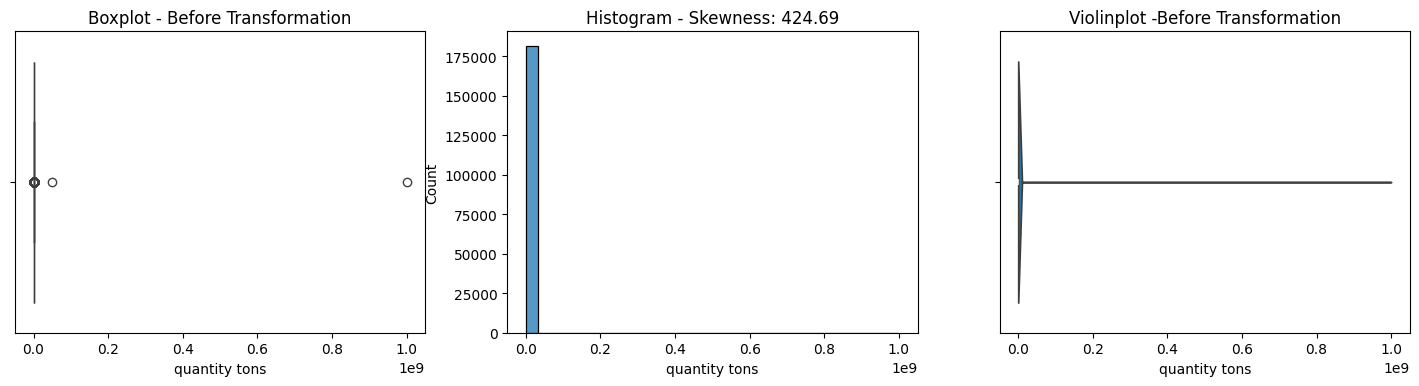

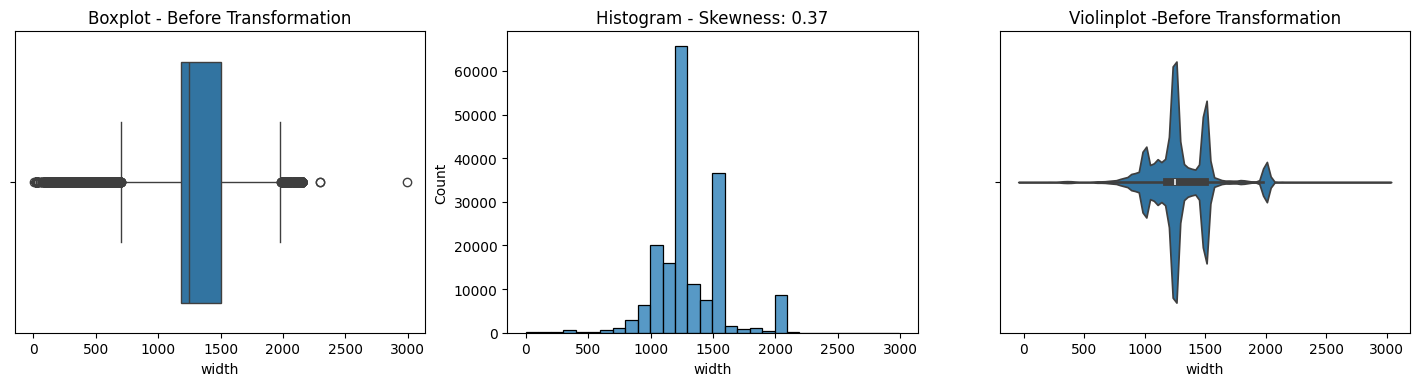

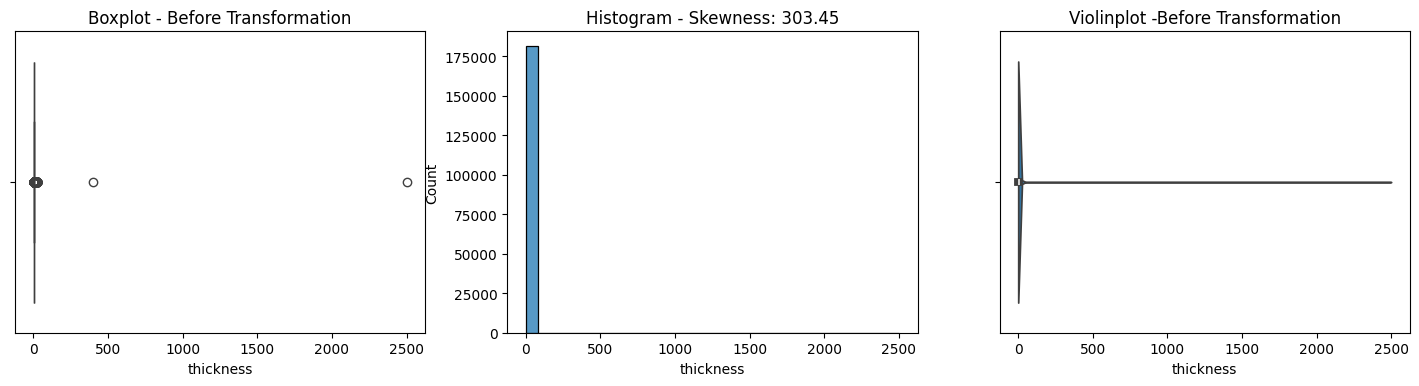

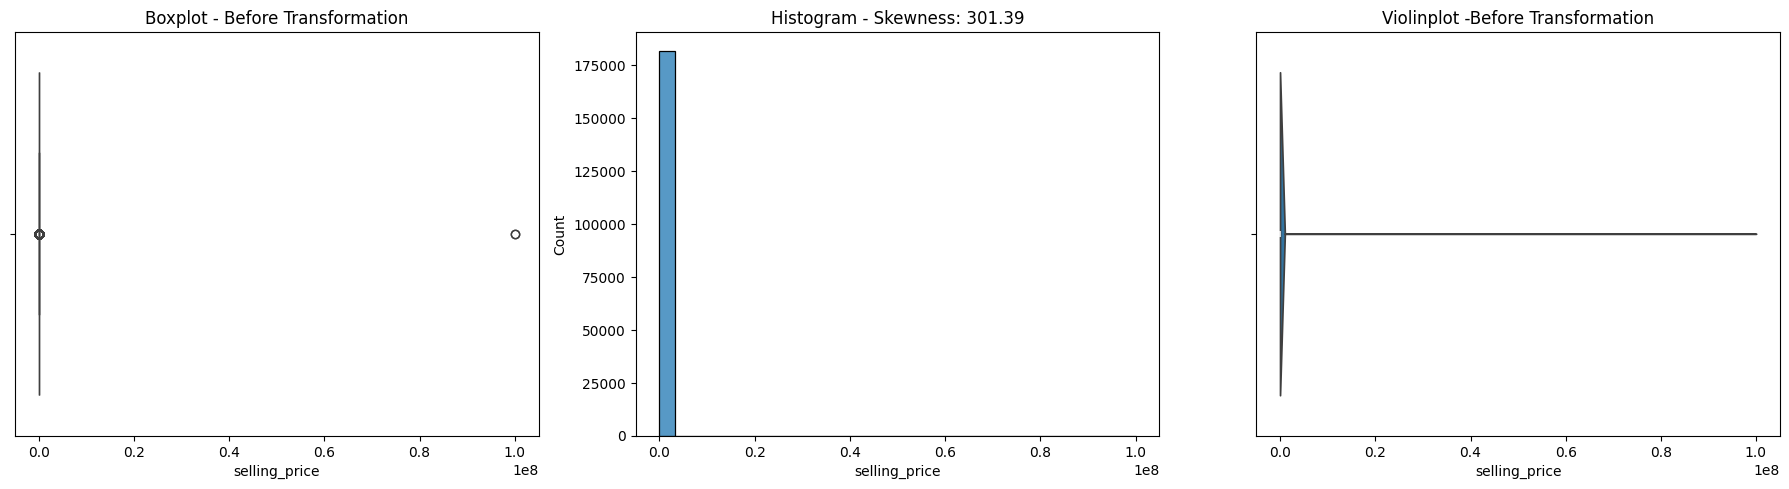

In [31]:
# Specify numerical columns for analysis
numerical_columns = ['quantity tons','width','thickness','selling_price']
# calling the Skewness_plot function
skewness_plot(df, *numerical_columns)


In [32]:
df1 = df.copy()

In [33]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data

def Log_Transformation(df, *column):

    for col_name in column:
        # Log transformation
        df[col_name+'_log'] = np.log1p(df[col_name])

    column = [i for i in df.columns if 'log' in i]

    return skewness_plot(df, * column)

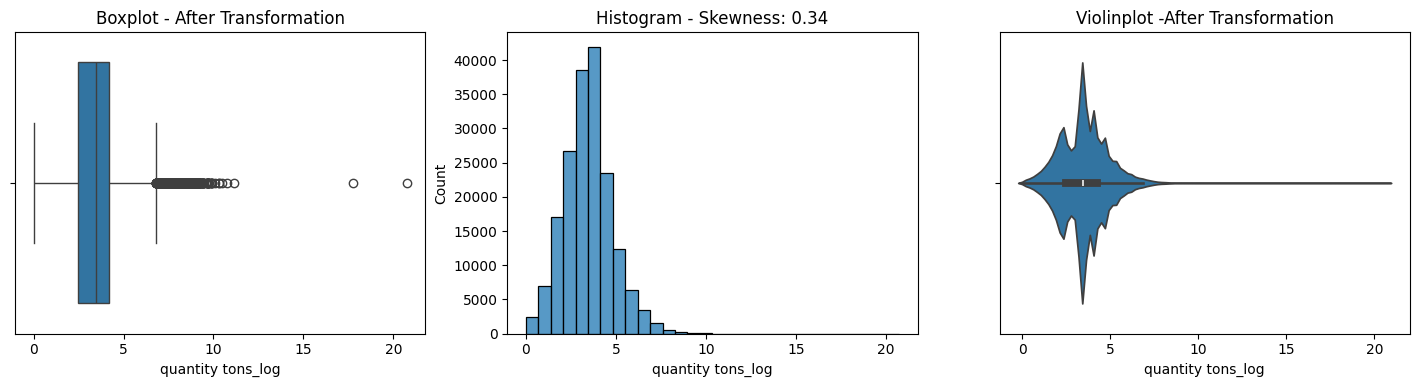

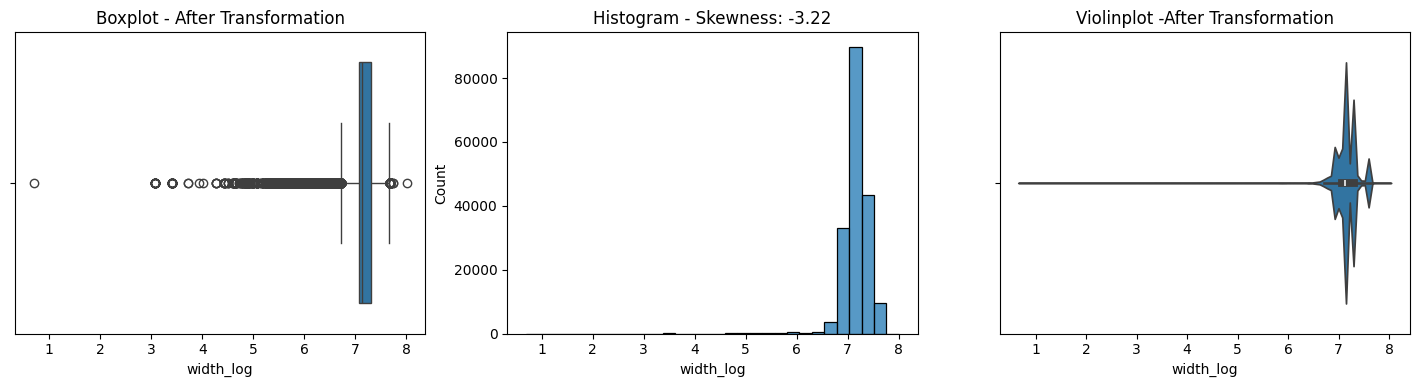

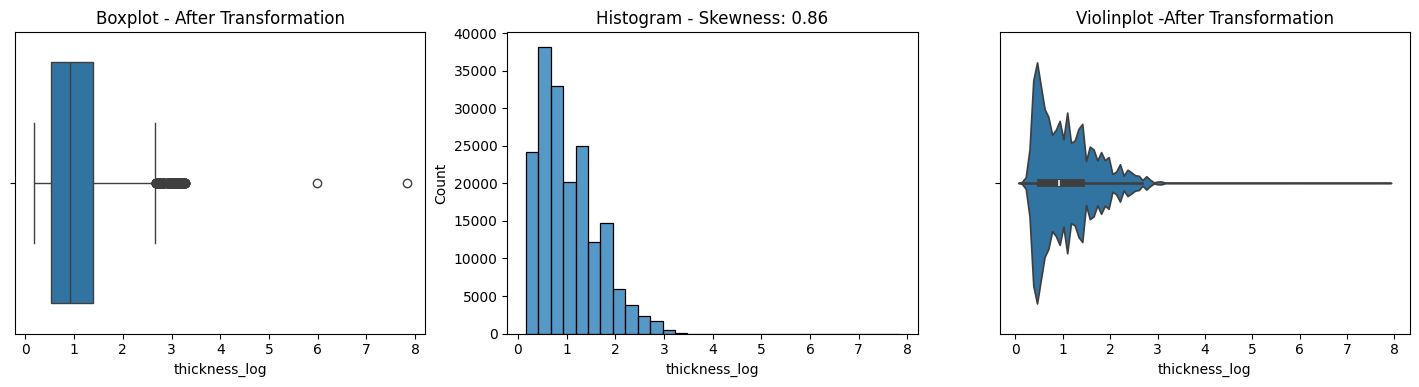

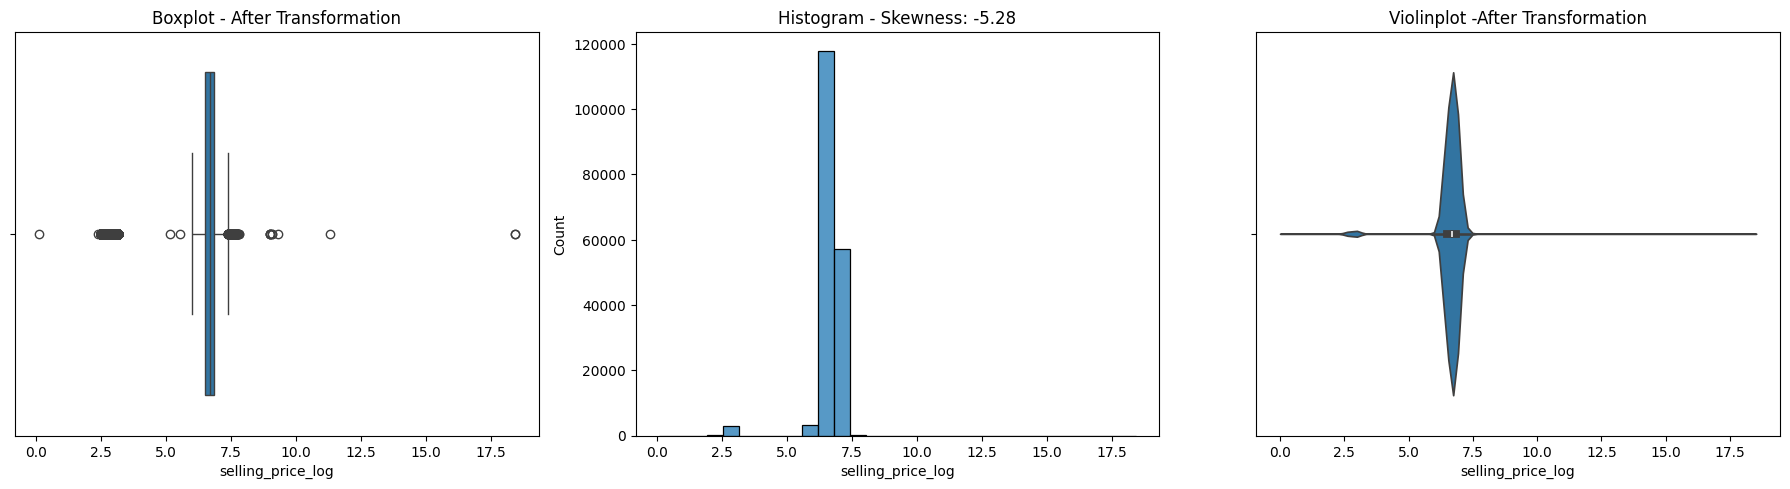

In [34]:
Log_Transformation(df1, *numerical_columns)

<Axes: >

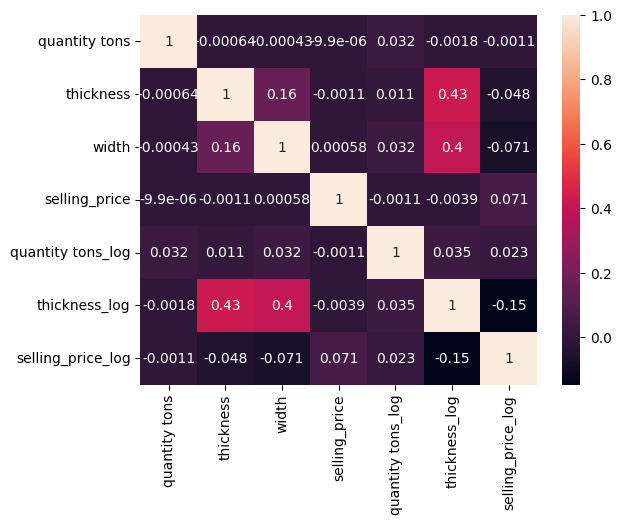

In [35]:
column_name = ['quantity tons','thickness','width','selling_price','quantity tons_log','thickness_log','selling_price_log']
sns.heatmap(df1[column_name].corr(), annot=True)

# Outliers Handling - Inrequartile Range (IQR) method

In [36]:
def outlier_plot(df):

    plt.figure(figsize=(16,10))

    plt.subplot(2, 2, 1)
    sns.boxplot(x='width', data=df)
    plt.title('BoxPlot - width')

    plt.subplot(2, 2, 2)
    sns.boxplot(x='quantity tons_log', data=df)
    plt.title('BoxPlot - quantity tons_log')

    plt.subplot(2, 2, 3)
    sns.boxplot(x='thickness_log', data=df)
    plt.title('BoxPlot - ' + 'thickness_log')

    plt.subplot(2, 2, 4)
    sns.boxplot(x='selling_price_log', data=df)
    plt.title('BoxPlot - ' + 'selling_price_log')
    plt.tight_layout()

    return plt.show()

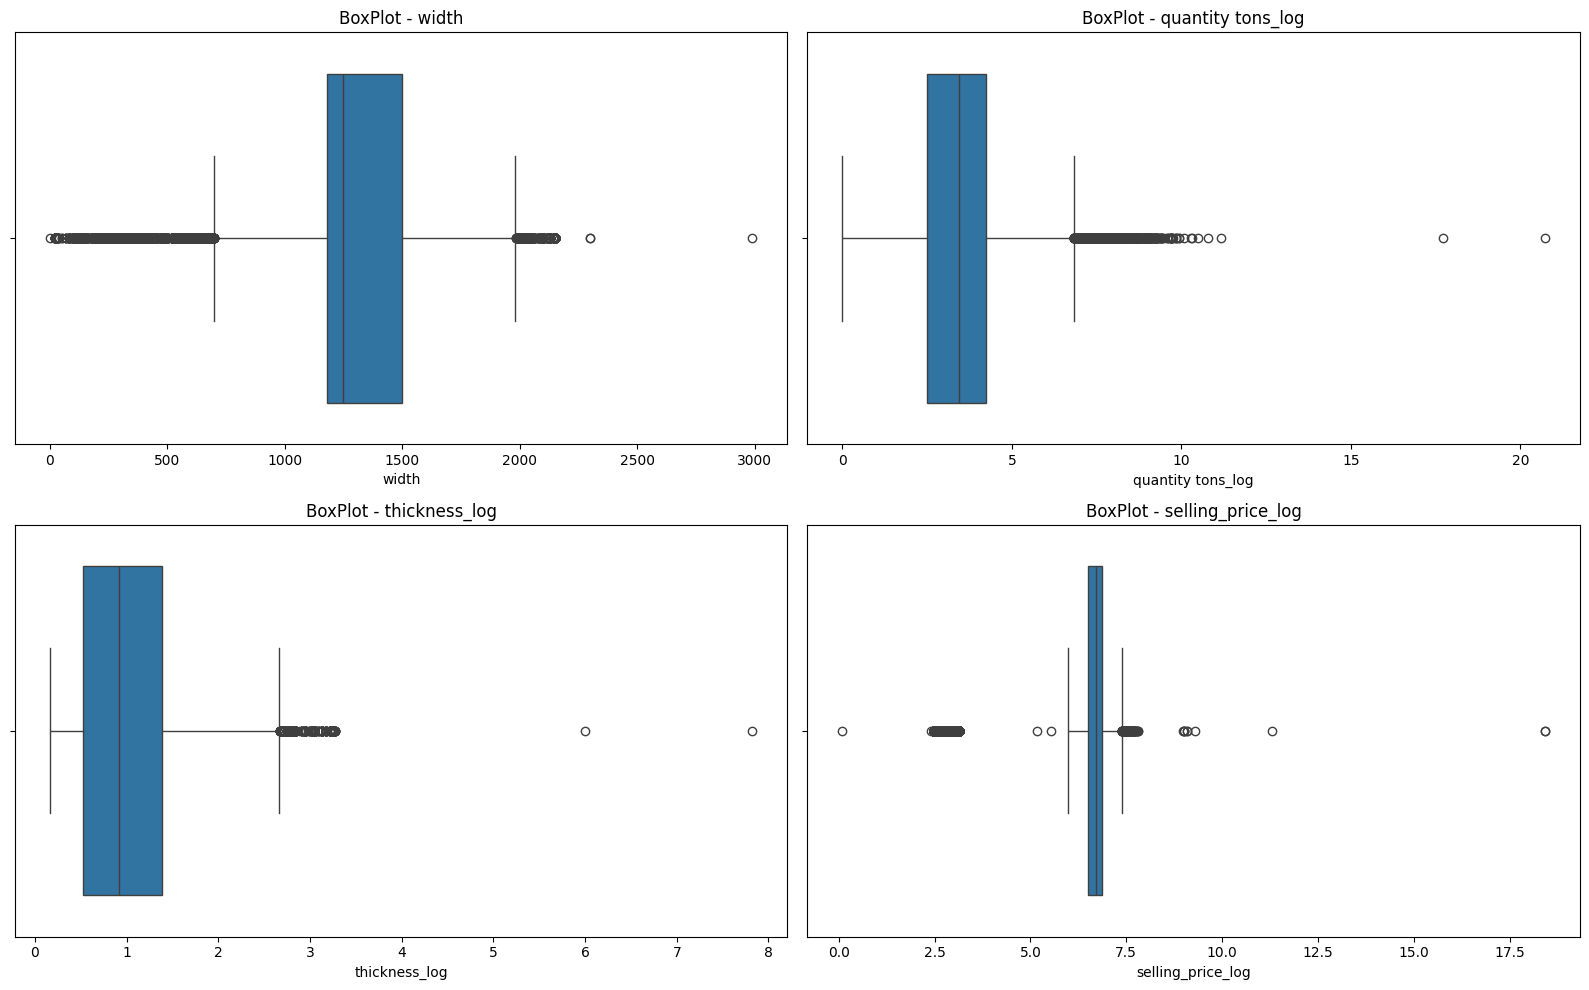

In [37]:
outlier_plot(df1)

In [38]:
df1

item_date  quantity tons    customer  country status item type  \
0      2021-04-01      54.151139  30156308.0     28.0    Won         W   
1      2021-04-01     768.024839  30202938.0     25.0    Won         W   
2      2021-04-01     386.127949  30153963.0     30.0    Won        WI   
3      2021-04-01     202.411065  30349574.0     32.0    Won         S   
4      2021-04-01     785.526262  30211560.0     28.0    Won         W   
...           ...            ...         ...      ...    ...       ...   
181668 2020-07-02     102.482422  30200854.0     25.0    Won         W   
181669 2020-07-02     208.086469  30200854.0     25.0    Won         W   
181670 2020-07-02       4.235594  30200854.0     25.0    Won         W   
181671 2020-07-02      30.365013  30200854.0     25.0    Won         W   
181672 2020-07-02     406.686538  30200854.0     25.0    Won         W   

        application  thickness   width  product_ref delivery date  \
0              10.0       2.00  1500.0   1670798778    2021-07-01   
1              41.0       0.80  1210.0   1668701718    2021-04-01   
2              28.0       0.38   952.0       628377    2021-01-01   
3              59.0       2.30  1317.0   1668701718    2021-01-01   
4              10.0       4.00  2000.0       640665    2021-03-01   
...             ...        ...     ...          ...           ...   
181668         41.0       0.96  1220.0    164141591    2020-07-01   
181669         41.0       0.95  1500.0    164141591    2020-07-01   
181670         41.0       0.71  1250.0    164141591    2020-07-01   
181671         41.0       0.85  1250.0    164141591    2020-07-01   
181672         41.0       0.71  1240.0    164141591    2020-07-01   

        selling_price  quantity tons_log  width_log  thickness_log  \
0              854.00           4.010077   7.313887       1.098612   
1             1047.00           6.645123   7.099202       0.587787   
2              644.33           5.958755   6.859615       0.322083   
3              768.00           5.315229   7.183871       1.193922   
4              577.00           6.667626   7.601402       1.609438   
...               ...                ...        ...            ...   
181668         591.00           4.639402   7.107425       0.672944   
181669         589.00           5.342748   7.313887       0.667829   
181670         619.00           1.655480   7.131699       0.536493   
181671         601.00           3.445693   7.131699       0.615186   
181672         607.00           6.010499   7.123673       0.536493   

        selling_price_log  
0                6.751101  
1                6.954639  
2                6.469762  
3                6.645091  
4                6.359574  
...                   ...  
181668           6.383507  
181669           6.380123  
181670           6.429719  
181671           6.400257  
181672           6.410175  

[181673 rows x 16 columns]

In [39]:
# Using IQR and clip() methods to handel the outliers and add a new column of DataFrame 

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [40]:
# (Ex: lower threshold = 5 and upeer threshold = 20)
# above upeer threshold values (>20) are converted to upeer threshold value (20) in features
# below lower threshold values (<5) are converted to lower threshold value (5) in features

outlier(df1, 'quantity tons_log')
outlier(df1, 'thickness_log')
outlier(df1, 'selling_price_log')
outlier(df1, 'width')

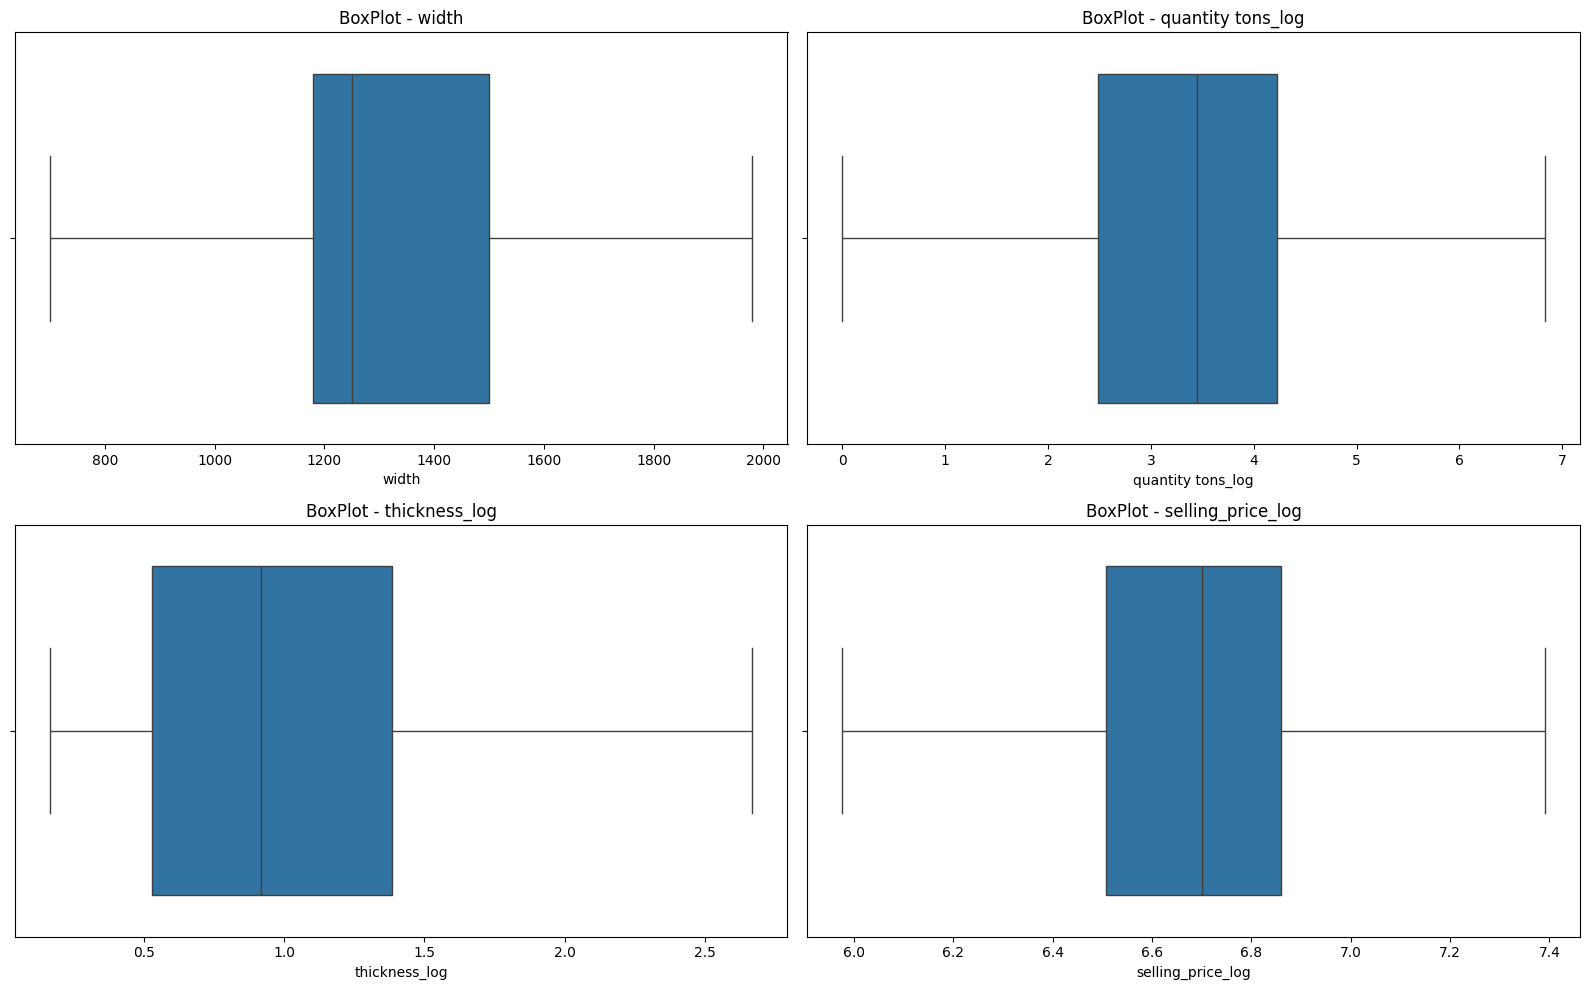

In [41]:
outlier_plot(df1)

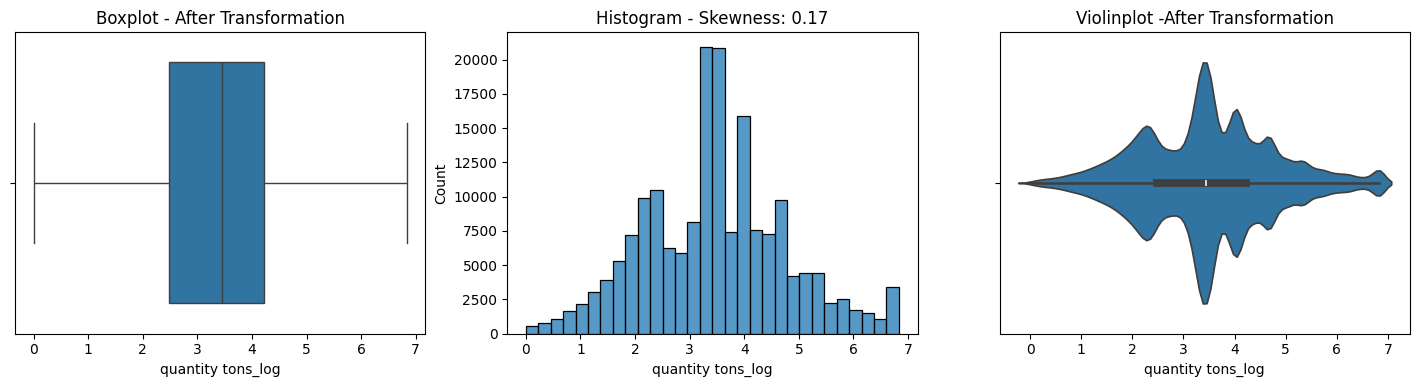

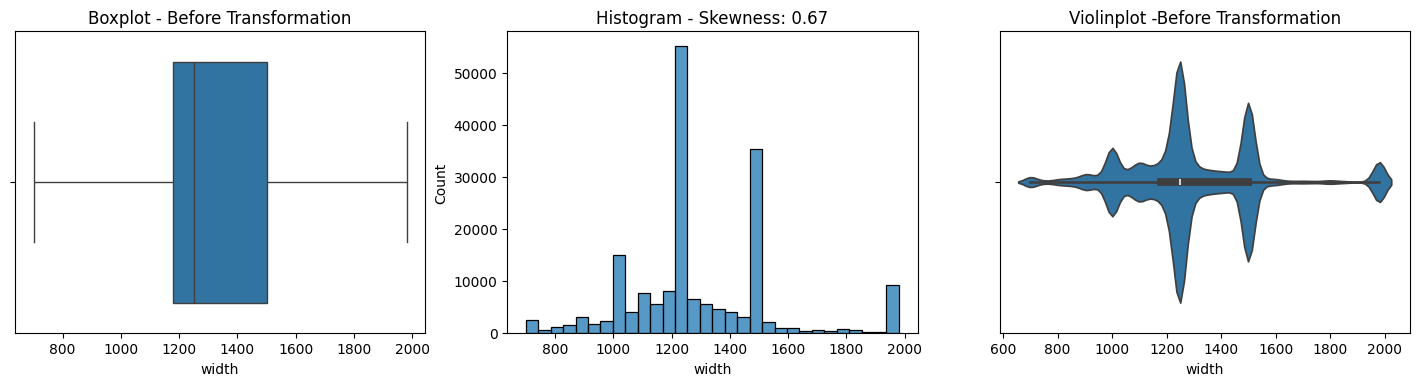

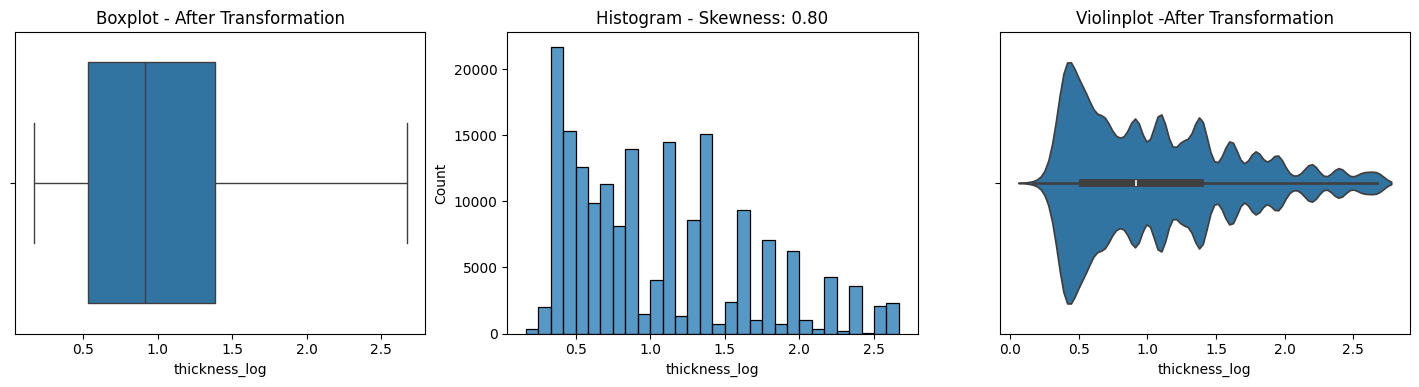

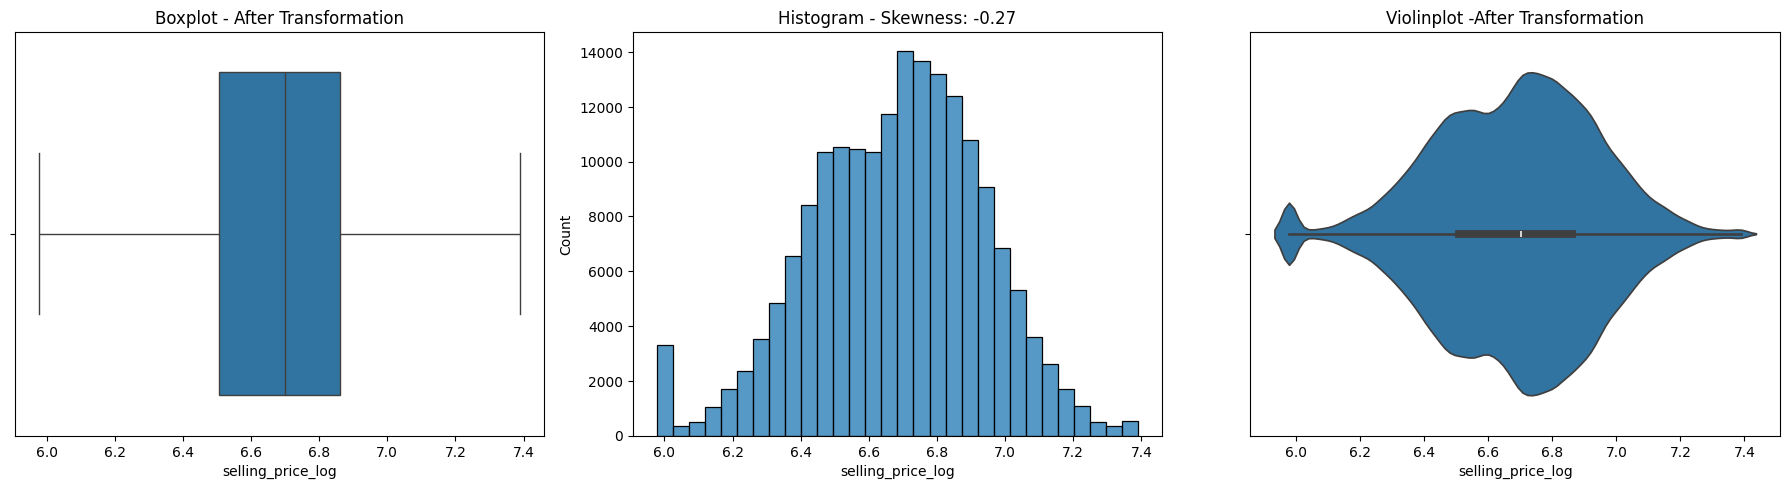

In [42]:
outlier_handle_col = ['quantity tons_log', 'width', 'thickness_log', 'selling_price_log']
skewness_plot(df1, *outlier_handle_col)


In [43]:
df1.head()

item_date  quantity tons    customer  country status item type  \
0 2021-04-01      54.151139  30156308.0     28.0    Won         W   
1 2021-04-01     768.024839  30202938.0     25.0    Won         W   
2 2021-04-01     386.127949  30153963.0     30.0    Won        WI   
3 2021-04-01     202.411065  30349574.0     32.0    Won         S   
4 2021-04-01     785.526262  30211560.0     28.0    Won         W   

   application  thickness   width  product_ref delivery date  selling_price  \
0         10.0       2.00  1500.0   1670798778    2021-07-01         854.00   
1         41.0       0.80  1210.0   1668701718    2021-04-01        1047.00   
2         28.0       0.38   952.0       628377    2021-01-01         644.33   
3         59.0       2.30  1317.0   1668701718    2021-01-01         768.00   
4         10.0       4.00  1980.0       640665    2021-03-01         577.00   

   quantity tons_log  width_log  thickness_log  selling_price_log  
0           4.010077   7.313887       1.098612           6.751101  
1           6.645123   7.099202       0.587787           6.954639  
2           5.958755   6.859615       0.322083           6.469762  
3           5.315229   7.183871       1.193922           6.645091  
4           6.667626   7.601402       1.609438           6.359574

<Axes: >

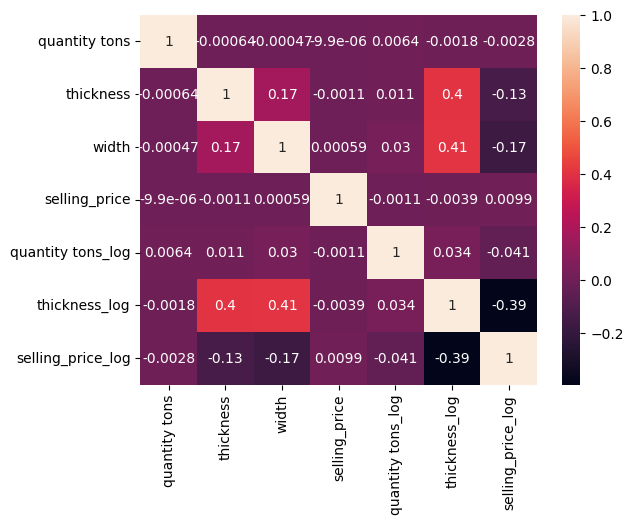

In [44]:
column_name = ['quantity tons','thickness', 'width', 'selling_price', 'quantity tons_log', 'thickness_log', 'selling_price_log']
sns.heatmap(df1[column_name].corr(), annot=True )

In [45]:
df1.drop(columns=['width_log'], inplace=True)
df1

item_date  quantity tons    customer  country status item type  \
0      2021-04-01      54.151139  30156308.0     28.0    Won         W   
1      2021-04-01     768.024839  30202938.0     25.0    Won         W   
2      2021-04-01     386.127949  30153963.0     30.0    Won        WI   
3      2021-04-01     202.411065  30349574.0     32.0    Won         S   
4      2021-04-01     785.526262  30211560.0     28.0    Won         W   
...           ...            ...         ...      ...    ...       ...   
181668 2020-07-02     102.482422  30200854.0     25.0    Won         W   
181669 2020-07-02     208.086469  30200854.0     25.0    Won         W   
181670 2020-07-02       4.235594  30200854.0     25.0    Won         W   
181671 2020-07-02      30.365013  30200854.0     25.0    Won         W   
181672 2020-07-02     406.686538  30200854.0     25.0    Won         W   

        application  thickness   width  product_ref delivery date  \
0              10.0       2.00  1500.0   1670798778    2021-07-01   
1              41.0       0.80  1210.0   1668701718    2021-04-01   
2              28.0       0.38   952.0       628377    2021-01-01   
3              59.0       2.30  1317.0   1668701718    2021-01-01   
4              10.0       4.00  1980.0       640665    2021-03-01   
...             ...        ...     ...          ...           ...   
181668         41.0       0.96  1220.0    164141591    2020-07-01   
181669         41.0       0.95  1500.0    164141591    2020-07-01   
181670         41.0       0.71  1250.0    164141591    2020-07-01   
181671         41.0       0.85  1250.0    164141591    2020-07-01   
181672         41.0       0.71  1240.0    164141591    2020-07-01   

        selling_price  quantity tons_log  thickness_log  selling_price_log  
0              854.00           4.010077       1.098612           6.751101  
1             1047.00           6.645123       0.587787           6.954639  
2              644.33           5.958755       0.322083           6.469762  
3              768.00           5.315229       1.193922           6.645091  
4              577.00           6.667626       1.609438           6.359574  
...               ...                ...            ...                ...  
181668         591.00           4.639402       0.672944           6.383507  
181669         589.00           5.342748       0.667829           6.380123  
181670         619.00           1.655480       0.536493           6.429719  
181671         601.00           3.445693       0.615186           6.400257  
181672         607.00           6.010499       0.536493           6.410175  

[181673 rows x 15 columns]

In [46]:
df1.dtypes

item_date            datetime64[ns]
quantity tons               float64
customer                    float64
country                     float64
status                       object
item type                    object
application                 float64
thickness                   float64
width                       float64
product_ref                   int64
delivery date        datetime64[ns]
selling_price               float64
quantity tons_log           float64
thickness_log               float64
selling_price_log           float64
dtype: object

In [81]:
df2 = df1.copy()

# Find the difference between item and delivery date and add the new column in dataframe
df2['day_difference'] = (pd.to_datetime(df2['delivery date']) - pd.to_datetime(df2['item_date'])).dt.days

In [82]:
df2['item_date'] = pd.to_datetime(df2['item_date'], format='%y%m%d')
df2['delivery date'] = pd.to_datetime(df2['delivery date'], format='%y%m%d')

df2['item_date_day'] = df2['item_date'].dt.day
df2['item_date_month'] = df2['item_date'].dt.month
df2['item_date_year'] = df2['item_date'].dt.year
df2

item_date  quantity tons    customer  country status item type  \
0      2021-04-01      54.151139  30156308.0     28.0    Won         W   
1      2021-04-01     768.024839  30202938.0     25.0    Won         W   
2      2021-04-01     386.127949  30153963.0     30.0    Won        WI   
3      2021-04-01     202.411065  30349574.0     32.0    Won         S   
4      2021-04-01     785.526262  30211560.0     28.0    Won         W   
...           ...            ...         ...      ...    ...       ...   
181668 2020-07-02     102.482422  30200854.0     25.0    Won         W   
181669 2020-07-02     208.086469  30200854.0     25.0    Won         W   
181670 2020-07-02       4.235594  30200854.0     25.0    Won         W   
181671 2020-07-02      30.365013  30200854.0     25.0    Won         W   
181672 2020-07-02     406.686538  30200854.0     25.0    Won         W   

        application  thickness   width  product_ref delivery date  \
0              10.0       2.00  1500.0   1670798778    2021-07-01   
1              41.0       0.80  1210.0   1668701718    2021-04-01   
2              28.0       0.38   952.0       628377    2021-01-01   
3              59.0       2.30  1317.0   1668701718    2021-01-01   
4              10.0       4.00  1980.0       640665    2021-03-01   
...             ...        ...     ...          ...           ...   
181668         41.0       0.96  1220.0    164141591    2020-07-01   
181669         41.0       0.95  1500.0    164141591    2020-07-01   
181670         41.0       0.71  1250.0    164141591    2020-07-01   
181671         41.0       0.85  1250.0    164141591    2020-07-01   
181672         41.0       0.71  1240.0    164141591    2020-07-01   

        selling_price  quantity tons_log  thickness_log  selling_price_log  \
0              854.00           4.010077       1.098612           6.751101   
1             1047.00           6.645123       0.587787           6.954639   
2              644.33           5.958755       0.322083           6.469762   
3              768.00           5.315229       1.193922           6.645091   
4              577.00           6.667626       1.609438           6.359574   
...               ...                ...            ...                ...   
181668         591.00           4.639402       0.672944           6.383507   
181669         589.00           5.342748       0.667829           6.380123   
181670         619.00           1.655480       0.536493           6.429719   
181671         601.00           3.445693       0.615186           6.400257   
181672         607.00           6.010499       0.536493           6.410175   

        day_difference  item_date_day  item_date_month  item_date_year  
0                   91              1                4            2021  
1                    0              1                4            2021  
2                  -90              1                4            2021  
3                  -90              1                4            2021  
4                  -31              1                4            2021  
...                ...            ...              ...             ...  
181668              -1              2                7            2020  
181669              -1              2                7            2020  
181670              -1              2                7            2020  
181671              -1              2                7            2020  
181672              -1              2                7            2020  

[181673 rows x 19 columns]

In [83]:
# split the non-negative value of 'Date_difference' column in separate dataFrame

non_negative_delivery_date_df = df2[df2['day_difference'] > 0]

# split negative value od 'Date_difference' column in another dataframe

negative_delivery_date_df = df2[df2['day_difference'] <= 0]

non_negative_delivery_date_df.shape, negative_delivery_date_df.shape

((165105, 19), (16568, 19))

In [84]:
# make a copy of that

correct_delivery_date = non_negative_delivery_date_df.copy()
inconsistance_delivery_date = negative_delivery_date_df.copy()


In [85]:
from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              ExtraTreesRegressor,
                              GradientBoostingRegressor,
                              HistGradientBoostingRegressor
                              )
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [86]:
class Regression:

    def __init__(self, x, y):
        self.models = {
            'AdaboostRegressor': AdaBoostRegressor(),
            'RandomForestRegressor': RandomForestRegressor(),
            'ExtraTreesRegressor': ExtraTreesRegressor(),
            'GradientBoostingRegressor': GradientBoostingRegressor(),
            'HistGradientBoostingRegressor': HistGradientBoostingRegressor(),
            'DecisionTreeRegressor' : DecisionTreeRegressor(),
            'XGBRegressor': XGBRegressor()
        }
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    def evaluate_model(self, model_name, model):
        y_train_pred = model.fit(self.x_train, self.y_train).predict(self.x_train)
        y_test_pred = model.predict(self.x_test)

        result = {
            'Model_Name': model_name,
            'Train_Mean_Square_Error': f'{mean_squared_error(self.y_train, y_train_pred): .4e}',
            'Test_Mean_Square_Error': f'{mean_squared_error(self.y_test, y_test_pred): .4e}',
            'Train_Mean_Absolute_Error': round(mean_absolute_error(self.y_train, y_train_pred), 4),
            'Test_Mean_Absolute_Error': round(mean_absolute_error(self.y_test, y_test_pred), 4),
            'Train_R2_Score': f'{r2_score(self.y_train, y_train_pred): .4e}',
            'Test_R2_Score': round(r2_score(self.y_test, y_test_pred), 4),
        }

        return result

    def all_models(self):
        # Train and evalute each model
        results = [self.evaluate_model(model_name, model) for model_name, model in self.models.items()]

        self.model_score_df = pd.DataFrame(results)

        return self.model_score_df


In [87]:
# categorical to numerical conversion

enc = OrdinalEncoder()
for col in ['delivery date','item_date', 'status','item type']:
    correct_delivery_date[col] = enc.fit_transform(correct_delivery_date[[col]])
    inconsistance_delivery_date[col] = enc.fit_transform(inconsistance_delivery_date[[col]])

In [88]:
# split to asign the independend and depentend features in correct_delivery_date

y = correct_delivery_date['day_difference']
x = correct_delivery_date.drop(['day_difference','item_date', 'delivery date'], axis= 1)

In [89]:
# Train models using the 'regression_method

models = Regression(x, y)
results_df = models.all_models()
results_df


Model_Name Train_Mean_Square_Error  \
0              AdaboostRegressor              1.4043e+03   
1          RandomForestRegressor              1.2523e+01   
2            ExtraTreesRegressor              0.0000e+00   
3      GradientBoostingRegressor              6.8838e+02   
4  HistGradientBoostingRegressor              4.1304e+02   
5          DecisionTreeRegressor              0.0000e+00   
6                   XGBRegressor              2.3879e+02   

  Test_Mean_Square_Error  Train_Mean_Absolute_Error  Test_Mean_Absolute_Error  \
0             1.3987e+03                    31.8254                   31.6849   
1             8.9138e+01                     1.3587                    3.6388   
2             6.7865e+01                     0.0000                    2.8569   
3             6.9877e+02                    20.5329                   20.5977   
4             4.2939e+02                    15.0651                   15.3003   
5             1.6546e+02                     0.0000                    3.2424   
6             2.7050e+02                    10.7251                   11.3160   

  Train_R2_Score  Test_R2_Score  
0     8.5655e-02         0.0858  
1     9.9185e-01         0.9417  
2     1.0000e+00         0.9556  
3     5.5178e-01         0.5433  
4     7.3106e-01         0.7193  
5     1.0000e+00         0.8918  
6     8.4452e-01         0.8232

In [90]:
def train_and_evalute(x, y, inconsistent_data):
    # Split the original dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Train a RandomForestRegressor
    model = RandomForestRegressor(random_state=42)
    model.fit(x_train, y_train)

    # predictions on training and testing sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate mean Square errors
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Train_Mean_Square_Error:{round(mse_train, 4)}')
    print(f'Test_Mean_Square_Error: {round(mse_test, 4)}')

    # Extract features for inconsistent delivery date data
    y_new = inconsistent_data['day_difference']
    x_new = inconsistent_data.drop(['day_difference','item_date', 'delivery date'],axis = 1)

    # Predict day_difference for inconsistent delivery dates
    day_pred = model.predict(x_new)

    return day_pred


In [91]:
day_pred = train_and_evalute(x, y, inconsistance_delivery_date)

Train_Mean_Square_Error:12.3424
Test_Mean_Square_Error: 89.1131


In [92]:
# Update 'day_difference' in the original Dataframe

negative_delivery_date_df['day_difference'] = day_pred

In [93]:
negative_delivery_date_df.head()

item_date  quantity tons    customer  country status item type  \
1 2021-04-01     768.024839  30202938.0     25.0    Won         W   
2 2021-04-01     386.127949  30153963.0     30.0    Won        WI   
3 2021-04-01     202.411065  30349574.0     32.0    Won         S   
4 2021-04-01     785.526262  30211560.0     28.0    Won         W   
5 2021-04-01     225.790676  30202938.0     25.0    Won         W   

   application  thickness   width  product_ref delivery date  selling_price  \
1         41.0       0.80  1210.0   1668701718    2021-04-01        1047.00   
2         28.0       0.38   952.0       628377    2021-01-01         644.33   
3         59.0       2.30  1317.0   1668701718    2021-01-01         768.00   
4         10.0       4.00  1980.0       640665    2021-03-01         577.00   
5         41.0       1.50  1265.0   1668701718    2021-04-01         983.00   

   quantity tons_log  thickness_log  selling_price_log  day_difference  \
1           6.645123       0.587787           6.954639          110.23   
2           5.958755       0.322083           6.469762           73.89   
3           5.315229       1.193922           6.645091           57.64   
4           6.667626       1.609438           6.359574           96.54   
5           5.424027       0.916291           6.891626          104.85   

   item_date_day  item_date_month  item_date_year  
1              1                4            2021  
2              1                4            2021  
3              1                4            2021  
4              1                4            2021  
5              1                4            2021

In [94]:
# update "delivery_date" with the help of 'day_defference' in the original DataFrame
negative_delivery_date_df['delivery date'] = negative_delivery_date_df['item_date'] + pd.to_timedelta(negative_delivery_date_df['day_difference'], unit='d')

negative_delivery_date_df.head()

item_date  quantity tons    customer  country status item type  \
1 2021-04-01     768.024839  30202938.0     25.0    Won         W   
2 2021-04-01     386.127949  30153963.0     30.0    Won        WI   
3 2021-04-01     202.411065  30349574.0     32.0    Won         S   
4 2021-04-01     785.526262  30211560.0     28.0    Won         W   
5 2021-04-01     225.790676  30202938.0     25.0    Won         W   

   application  thickness   width  product_ref       delivery date  \
1         41.0       0.80  1210.0   1668701718 2021-07-20 05:31:12   
2         28.0       0.38   952.0       628377 2021-06-13 21:21:36   
3         59.0       2.30  1317.0   1668701718 2021-05-28 15:21:36   
4         10.0       4.00  1980.0       640665 2021-07-06 12:57:36   
5         41.0       1.50  1265.0   1668701718 2021-07-14 20:24:00   

   selling_price  quantity tons_log  thickness_log  selling_price_log  \
1        1047.00           6.645123       0.587787           6.954639   
2         644.33           5.958755       0.322083           6.469762   
3         768.00           5.315229       1.193922           6.645091   
4         577.00           6.667626       1.609438           6.359574   
5         983.00           5.424027       0.916291           6.891626   

   day_difference  item_date_day  item_date_month  item_date_year  
1          110.23              1                4            2021  
2           73.89              1                4            2021  
3           57.64              1                4            2021  
4           96.54              1                4            2021  
5          104.85              1                4            2021

In [95]:
# Take  a copy for the purpose of saving the data
sample = negative_delivery_date_df.copy()

In [96]:
negative_delivery_date_df['item_date'] = pd.to_datetime(negative_delivery_date_df['item_date'])

# Update the 'delivery date' using apply and a lambda function
negative_delivery_date_df['delivery date'] = negative_delivery_date_df.apply(
    lambda row: row['item_date'] + pd.Timedelta(days=row['day_difference']), axis=1
)
negative_delivery_date_df.head()

item_date  quantity tons    customer  country status item type  \
1 2021-04-01     768.024839  30202938.0     25.0    Won         W   
2 2021-04-01     386.127949  30153963.0     30.0    Won        WI   
3 2021-04-01     202.411065  30349574.0     32.0    Won         S   
4 2021-04-01     785.526262  30211560.0     28.0    Won         W   
5 2021-04-01     225.790676  30202938.0     25.0    Won         W   

   application  thickness   width  product_ref                 delivery date  \
1         41.0       0.80  1210.0   1668701718 2021-07-20 05:31:12.000000000   
2         28.0       0.38   952.0       628377 2021-06-13 21:21:36.000000000   
3         59.0       2.30  1317.0   1668701718 2021-05-28 15:21:36.000000000   
4         10.0       4.00  1980.0       640665 2021-07-06 12:57:36.000000000   
5         41.0       1.50  1265.0   1668701718 2021-07-14 20:23:59.999999998   

   selling_price  quantity tons_log  thickness_log  selling_price_log  \
1        1047.00           6.645123       0.587787           6.954639   
2         644.33           5.958755       0.322083           6.469762   
3         768.00           5.315229       1.193922           6.645091   
4         577.00           6.667626       1.609438           6.359574   
5         983.00           5.424027       0.916291           6.891626   

   day_difference  item_date_day  item_date_month  item_date_year  
1          110.23              1                4            2021  
2           73.89              1                4            2021  
3           57.64              1                4            2021  
4           96.54              1                4            2021  
5          104.85              1                4            2021

In [97]:
final_copper_data = pd.concat([non_negative_delivery_date_df, negative_delivery_date_df],axis=0, ignore_index=True)

# Extract day, mont, and year components from 'delivery date' 
final_copper_data['delivery date'] = pd.to_datetime(final_copper_data['delivery date'])
final_copper_data['delivery_date_day'] = final_copper_data['delivery date'].dt.day
final_copper_data['delivery_date_month'] = final_copper_data['delivery date'].dt.month
final_copper_data['delivery_date_year'] = final_copper_data['delivery date'].dt.year
final_copper_data.head()

item_date  quantity tons    customer  country status item type  \
0 2021-04-01      54.151139  30156308.0     28.0    Won         W   
1 2021-04-01       3.522613  30209509.0     30.0  Draft         W   
2 2021-04-01      69.071853  30341428.0     38.0    Won         S   
3 2021-04-01       9.175770  30209509.0     30.0  Draft         W   
4 2021-04-01      27.512545  30165529.0     78.0    Won         W   

   application  thickness   width  product_ref  ... quantity tons_log  \
0         10.0       2.00  1500.0   1670798778  ...          4.010077   
1         41.0       0.38  1125.0       611993  ...          1.509090   
2         10.0       0.60  1275.0   1668701376  ...          4.249521   
3         41.0       0.38  1125.0       611993  ...          2.320009   
4         10.0       0.75  1250.0    164141591  ...          3.350344   

   thickness_log  selling_price_log  day_difference  item_date_day  \
0       1.098612           6.751101            91.0              1   
1       0.322083           5.977199            91.0              1   
2       0.470004           7.218177            91.0              1   
3       0.322083           5.977199            91.0              1   
4       0.559616           7.002156            91.0              1   

   item_date_month  item_date_year  delivery_date_day  delivery_date_month  \
0                4            2021                  1                    7   
1                4            2021                  1                    7   
2                4            2021                  1                    7   
3                4            2021                  1                    7   
4                4            2021                  1                    7   

   delivery_date_year  
0                2021  
1                2021  
2                2021  
3                2021  
4                2021  

[5 rows x 22 columns]

In [98]:
# Drop 'item_date' and 'delivery date' columns 
final_copper_data.drop(['item_date','delivery date'], axis=1, inplace=True)
final_copper_data


quantity tons    customer  country status item type  application  \
0           54.151139  30156308.0     28.0    Won         W         10.0   
1            3.522613  30209509.0     30.0  Draft         W         41.0   
2           69.071853  30341428.0     38.0    Won         S         10.0   
3            9.175770  30209509.0     30.0  Draft         W         41.0   
4           27.512545  30165529.0     78.0    Won         W         10.0   
...               ...         ...      ...    ...       ...          ...   
181668     102.482422  30200854.0     25.0    Won         W         41.0   
181669     208.086469  30200854.0     25.0    Won         W         41.0   
181670       4.235594  30200854.0     25.0    Won         W         41.0   
181671      30.365013  30200854.0     25.0    Won         W         41.0   
181672     406.686538  30200854.0     25.0    Won         W         41.0   

        thickness   width  product_ref  selling_price  quantity tons_log  \
0            2.00  1500.0   1670798778          854.0           4.010077   
1            0.38  1125.0       611993           18.0           1.509090   
2            0.60  1275.0   1668701376         1363.0           4.249521   
3            0.38  1125.0       611993           17.0           2.320009   
4            0.75  1250.0    164141591         1098.0           3.350344   
...           ...     ...          ...            ...                ...   
181668       0.96  1220.0    164141591          591.0           4.639402   
181669       0.95  1500.0    164141591          589.0           5.342748   
181670       0.71  1250.0    164141591          619.0           1.655480   
181671       0.85  1250.0    164141591          601.0           3.445693   
181672       0.71  1240.0    164141591          607.0           6.010499   

        thickness_log  selling_price_log  day_difference  item_date_day  \
0            1.098612           6.751101           91.00              1   
1            0.322083           5.977199           91.00              1   
2            0.470004           7.218177           91.00              1   
3            0.322083           5.977199           91.00              1   
4            0.559616           7.002156           91.00              1   
...               ...                ...             ...            ...   
181668       0.672944           6.383507           42.23              2   
181669       0.667829           6.380123           42.84              2   
181670       0.536493           6.429719           42.07              2   
181671       0.615186           6.400257           41.82              2   
181672       0.536493           6.410175           47.46              2   

        item_date_month  item_date_year  delivery_date_day  \
0                     4            2021                  1   
1                     4            2021                  1   
2                     4            2021                  1   
3                     4            2021                  1   
4                     4            2021                  1   
...                 ...             ...                ...   
181668                7            2020                 13   
181669                7            2020                 13   
181670                7            2020                 13   
181671                7            2020                 12   
181672                7            2020                 18   

        delivery_date_month  delivery_date_year  
0                         7                2021  
1                         7                2021  
2                         7                2021  
3                         7                2021  
4                         7                2021  
...                     ...                 ...  
181668                    8                2020  
181669                    8                2020  
181670                    8                2020  
181671                    8         

In [99]:
final_copper_data.to_csv("final_copper_data.csv", index=False)

# Classification method - Predict Status  

In [100]:
df = pd.read_csv(r"C:\Users\viren\OneDrive\Desktop\IIT-MADARAS(GUVI)\Industrial Copper Modeling\Industrial-Copper-Modeling\final_copper_data.csv")
final_copper_data =pd.DataFrame(df)
final_copper_data

quantity tons    customer  country status item type  application  \
0           54.151139  30156308.0     28.0    Won         W         10.0   
1            3.522613  30209509.0     30.0  Draft         W         41.0   
2           69.071853  30341428.0     38.0    Won         S         10.0   
3            9.175770  30209509.0     30.0  Draft         W         41.0   
4           27.512545  30165529.0     78.0    Won         W         10.0   
...               ...         ...      ...    ...       ...          ...   
181668     102.482422  30200854.0     25.0    Won         W         41.0   
181669     208.086469  30200854.0     25.0    Won         W         41.0   
181670       4.235594  30200854.0     25.0    Won         W         41.0   
181671      30.365013  30200854.0     25.0    Won         W         41.0   
181672     406.686538  30200854.0     25.0    Won         W         41.0   

        thickness   width  product_ref  selling_price  quantity tons_log  \
0            2.00  1500.0   1670798778          854.0           4.010077   
1            0.38  1125.0       611993           18.0           1.509090   
2            0.60  1275.0   1668701376         1363.0           4.249521   
3            0.38  1125.0       611993           17.0           2.320009   
4            0.75  1250.0    164141591         1098.0           3.350344   
...           ...     ...          ...            ...                ...   
181668       0.96  1220.0    164141591          591.0           4.639402   
181669       0.95  1500.0    164141591          589.0           5.342748   
181670       0.71  1250.0    164141591          619.0           1.655480   
181671       0.85  1250.0    164141591          601.0           3.445693   
181672       0.71  1240.0    164141591          607.0           6.010499   

        thickness_log  selling_price_log  day_difference  item_date_day  \
0            1.098612           6.751101           91.00              1   
1            0.322083           5.977199           91.00              1   
2            0.470004           7.218177           91.00              1   
3            0.322083           5.977199           91.00              1   
4            0.559616           7.002156           91.00              1   
...               ...                ...             ...            ...   
181668       0.672944           6.383507           42.23              2   
181669       0.667829           6.380123           42.84              2   
181670       0.536493           6.429719           42.07              2   
181671       0.615186           6.400257           41.82              2   
181672       0.536493           6.410175           47.46              2   

        item_date_month  item_date_year  delivery_date_day  \
0                     4            2021                  1   
1                     4            2021                  1   
2                     4            2021                  1   
3                     4            2021                  1   
4                     4            2021                  1   
...                 ...             ...                ...   
181668                7            2020                 13   
181669                7            2020                 13   
181670                7            2020                 13   
181671                7            2020                 12   
181672                7            2020                 18   

        delivery_date_month  delivery_date_year  
0                         7                2021  
1                         7                2021  
2                         7                2021  
3                         7                2021  
4                         7                2021  
...                     ...                 ...  
181668                    8                2020  
181669                    8                2020  
181670                    8                2020  
181671                    8         

In [67]:
# Filter rows where 'Status' is either 'Won' or 'Lost'
final_data = final_copper_data[(final_copper_data['status'] == 'Won') | (final_copper_data['status'] == 'Lost')]
final_data

quantity tons    customer  country status item type  application  \
0           54.151139  30156308.0     28.0    Won         W         10.0   
1          386.127949  30153963.0     30.0    Won        WI         28.0   
2          202.411065  30349574.0     32.0    Won         S         59.0   
3          785.526262  30211560.0     28.0    Won         W         10.0   
5          113.387124  30342192.0     32.0    Won         W         41.0   
...               ...         ...      ...    ...       ...          ...   
181667      17.840729  30223158.0     32.0    Won        PL         15.0   
181668      12.512431  30223158.0     32.0    Won        PL         15.0   
181669      31.050578  30223158.0     32.0    Won        PL         15.0   
181670      19.372303  30223158.0     32.0    Won        PL         15.0   
181671      18.937869  30223158.0     32.0    Won        PL         15.0   

        thickness   width  product_ref  selling_price  quantity tons_log  \
0            2.00  1500.0   1670798778         854.00           4.010077   
1            0.38   952.0       628377         644.33           5.958755   
2            2.30  1317.0   1668701718         768.00           5.315229   
3            4.00  1980.0       640665         577.00           6.667626   
5            0.68  1220.0       611993         931.00           4.739589   
...           ...     ...          ...            ...                ...   
181667      15.00  1500.0       640405         551.00           2.936021   
181668       2.00  1500.0   1671863738         584.00           2.603610   
181669       3.00  1500.0   1671863738         560.00           3.467315   
181670      11.99  1330.0   1671863738         634.00           3.014176   
181671       8.00  1500.0   1671863738         664.00           2.992621   

        thickness_log  selling_price_log  day_difference  item_date_day  \
0            1.098612           6.751101           91.00              1   
1            0.322083           6.469762           90.00              1   
2            1.193922           6.645091           90.00              1   
3            1.609438           6.359574           31.00              1   
5            0.518794           6.837333           90.00              1   
...               ...                ...             ...            ...   
181667       2.669794           6.313548           54.97              1   
181668       1.098612           6.371612           57.10              1   
181669       1.386294           6.329721           55.24              1   
181670       2.564180           6.453625           49.94              1   
181671       2.197225           6.499787           51.03              1   

        item_date_month  item_date_year  delivery_date_day  \
0                     4            2021                  1   
1                     4            2021                  1   
2                     4            2021                  1   
3                     4            2021                  1   
5                     4            2021                  1   
...                 ...             ...                ...   
181667                9            2020                 25   
181668                9            2020                 28   
181669                9            2020                 26   
181670                9            2020                 20   
181671                9            2020                 22   

        delivery_date_month  delivery_date_year  
0                         7                2021  
1                         1                2021  
2                         1                2021  
3                         3                2021  
5                         1                2021  
...                     ...                 ...  
181667                   10                2020  
181668                   10                2020  
181669                   10                2020  
181670                   10         

In [101]:
print(final_data['status'].unique())
print(final_data['item type'].unique())

[1. 0.]
[5. 6. 3. 1. 2. 0. 4.]


In [102]:
final_data.status.value_counts()

status
1.0    116012
0.0     34438
Name: count, dtype: int64

In [103]:
from sklearn.preprocessing import OrdinalEncoder
columns_to_encode = ['status','item type']

for col_name in columns_to_encode:
    encoder = OrdinalEncoder()
    final_data[col_name] = encoder.fit_transform(final_data[[col_name]])

In [104]:
print(final_data['status'].unique)
print(final_data['item type'].unique())

<bound method Series.unique of 0         1.0
1         1.0
2         1.0
3         1.0
5         1.0
         ... 
181667    1.0
181668    1.0
181669    1.0
181670    1.0
181671    1.0
Name: status, Length: 150450, dtype: float64>
[5. 6. 3. 1. 2. 0. 4.]


In [105]:
final_data

quantity tons    customer  country  status  item type  application  \
0           54.151139  30156308.0     28.0     1.0        5.0         10.0   
1          386.127949  30153963.0     30.0     1.0        6.0         28.0   
2          202.411065  30349574.0     32.0     1.0        3.0         59.0   
3          785.526262  30211560.0     28.0     1.0        5.0         10.0   
5          113.387124  30342192.0     32.0     1.0        5.0         41.0   
...               ...         ...      ...     ...        ...          ...   
181667      17.840729  30223158.0     32.0     1.0        2.0         15.0   
181668      12.512431  30223158.0     32.0     1.0        2.0         15.0   
181669      31.050578  30223158.0     32.0     1.0        2.0         15.0   
181670      19.372303  30223158.0     32.0     1.0        2.0         15.0   
181671      18.937869  30223158.0     32.0     1.0        2.0         15.0   

        thickness   width  product_ref  selling_price  quantity tons_log  \
0            2.00  1500.0   1670798778         854.00           4.010077   
1            0.38   952.0       628377         644.33           5.958755   
2            2.30  1317.0   1668701718         768.00           5.315229   
3            4.00  1980.0       640665         577.00           6.667626   
5            0.68  1220.0       611993         931.00           4.739589   
...           ...     ...          ...            ...                ...   
181667      15.00  1500.0       640405         551.00           2.936021   
181668       2.00  1500.0   1671863738         584.00           2.603610   
181669       3.00  1500.0   1671863738         560.00           3.467315   
181670      11.99  1330.0   1671863738         634.00           3.014176   
181671       8.00  1500.0   1671863738         664.00           2.992621   

        thickness_log  selling_price_log  day_difference  item_date_day  \
0            1.098612           6.751101           91.00              1   
1            0.322083           6.469762           90.00              1   
2            1.193922           6.645091           90.00              1   
3            1.609438           6.359574           31.00              1   
5            0.518794           6.837333           90.00              1   
...               ...                ...             ...            ...   
181667       2.669794           6.313548           54.97              1   
181668       1.098612           6.371612           57.10              1   
181669       1.386294           6.329721           55.24              1   
181670       2.564180           6.453625           49.94              1   
181671       2.197225           6.499787           51.03              1   

        item_date_month  item_date_year  delivery_date_day  \
0                     4            2021                  1   
1                     4            2021                  1   
2                     4            2021                  1   
3                     4            2021                  1   
5                     4            2021                  1   
...                 ...             ...                ...   
181667                9            2020                 25   
181668                9            2020                 28   
181669                9            2020                 26   
181670                9            2020                 20   
181671                9            2020                 22   

        delivery_date_month  delivery_date_year  
0                         7                2021  
1                         1                2021  
2                         1                2021  
3                         3                2021  
5                         1                2021  
...                     ...                 ...  
181667                   10                2020  
181668                   10                2020  
181669                   10                2020  
181670      

In [108]:
import pandas as pd

# Check the distribution of the target variable
class_distribution = final_data['status'].value_counts()

# print distribution
print("Class Distribution:")
print(class_distribution)

# Check if the classes are balanced or imbalanced
if len(class_distribution) == 2:
    minority_class, majority_class = class_distribution.index
    minority_samples = class_distribution[minority_class]
    majority_samples = class_distribution[majority_class]

    imbalance_ratio = majority_samples / minority_samples
    print("\nImbalance Ratio:",imbalance_ratio)

    if imbalance_ratio > 1.5: # Adjust this threshold based on our problem
        print("The classes are imbalanced.")
    else:
        print("The classes are balanced.")
else:
    print("Not a binary classification problem.")

Class Distribution:
status
1.0    116012
0.0     34438
Name: count, dtype: int64

Imbalance Ratio: 0.2968486018687722
The classes are balanced.


In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [75]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150450 entries, 0 to 181671
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   quantity tons        150450 non-null  float64
 1   customer             150450 non-null  float64
 2   country              150450 non-null  float64
 3   status               150450 non-null  float64
 4   item type            150450 non-null  float64
 5   application          150450 non-null  float64
 6   thickness            150450 non-null  float64
 7   width                150450 non-null  float64
 8   product_ref          150450 non-null  int64  
 9   selling_price        150450 non-null  float64
 10  quantity tons_log    150450 non-null  float64
 11  thickness_log        150450 non-null  float64
 12  selling_price_log    150450 non-null  float64
 13  day_difference       150450 non-null  float64
 14  item_date_day        150450 non-null  int64  
 15  item_date_month      1

In [109]:
# Define target variable 'y_new' and feature 'x_new'
y_new = final_data['status']
x_new = final_data.drop('status',axis=1)

In [110]:
def machine_learning_classification(x_new, y_new, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    return {
        'algorithm': algorithm.__name__,
        'accuracy_train': accuracy_train,
        'accuracy_test' : accuracy_test
    }

classifiers = [
    DecisionTreeClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    XGBClassifier
]

results = []

for classifier in classifiers:
    accuracy_metrics = machine_learning_classification(x_new, y_new, classifier)
    results.append(accuracy_metrics)

# Creating a DataFrame from the results
results_df = pd.DataFrame(results)
results_df

algorithm  accuracy_train  accuracy_test
0      DecisionTreeClassifier        1.000000       0.955301
1        ExtraTreesClassifier        1.000000       0.971452
2      RandomForestClassifier        1.000000       0.969059
3          AdaBoostClassifier        0.808267       0.805517
4  GradientBoostingClassifier        0.846868       0.842805
5               XGBClassifier        0.947208       0.934264

In [112]:
# Checking the accuracy_train b/w accuracy_test diferance
results_df['accuracy_train']-results_df['accuracy_test']

0    0.044699
1    0.028548
2    0.030941
3    0.002750
4    0.004063
5    0.012944
dtype: float64

In [113]:
# chossing ExtraTreeClassifier high accuracy on both the training set (1.0) and the test set (0.971)
# Fit an ExtraTreeClassifier model to the training set
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

model = ExtraTreesClassifier().fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9707876370887338

In [114]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120360, 19), (30090, 19), (120360,), (30090,))

In [76]:
# AWAY FROM THIS POINT, THE CODE IS NOT USED IN THE PROJECT
# df["item_date_1"] = pd.to_datetime(df["item_date"].astype(str).str.split('.').str[0],format='%y%m%d',errors='coerce')
# df["delivery_date_1"] = pd.to_datetime(df["delivery date"].astype(str).str.split('.').str[0],format='%y%m%d',errors='coerce')
# df["quantity tons"] = pd.to_numeric(df["quantity tons"],errors='coerce')

In [77]:
# df["item_date_1"] = pd.to_datetime(df["item_date"], unit="s", errors="coerce")
# df["delivery date_1"] = pd.to_datetime(df["delivery date"], unit="s", errors="coerce")
# df["quantity tons"] = pd.to_numeric(df["delivery date"], errors="coerce")

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   quantity tons        181673 non-null  float64
 1   customer             181673 non-null  float64
 2   country              181673 non-null  float64
 3   status               181673 non-null  object 
 4   item type            181673 non-null  object 
 5   application          181673 non-null  float64
 6   thickness            181673 non-null  float64
 7   width                181673 non-null  float64
 8   product_ref          181673 non-null  int64  
 9   selling_price        181673 non-null  float64
 10  quantity tons_log    181673 non-null  float64
 11  thickness_log        181673 non-null  float64
 12  selling_price_log    181673 non-null  float64
 13  day_difference       181673 non-null  float64
 14  item_date_day        181673 non-null  int64  
 15  item_date_month  

In [79]:
df.isnull().sum()

quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
quantity tons_log      0
thickness_log          0
selling_price_log      0
day_difference         0
item_date_day          0
item_date_month        0
item_date_year         0
delivery_date_day      0
delivery_date_month    0
delivery_date_year     0
dtype: int64

In [80]:
# removing the "00000" datas from "material_ref" column

df["material_ref"] = df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)

KeyError: 'material_ref'

In [ ]:
df.isnull().sum()


In [ ]:
# "material_ref" have a maximum number of null values ,so we need to drop that column
# id is a unique value so we also drop that column

df.drop(columns=["id","material_ref"],inplace=True)

In [ ]:
df.isnull().sum()


In [ ]:
df.describe().T

In [ ]:
print(df[['item_date_1', 'delivery_date_1']].head())
print(df[['item_date_1', 'delivery_date_1']].isna().sum())

In [ ]:
# converting selling_price values into null values

df["selling_price"] = df["selling_price"].apply(lambda x: np.nan if x <= 0 else x)

In [ ]:
df.nunique()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

# Hanlding the null values using mean(), median() and mode()

In [ ]:
# object columns and mode method
df["item_date_1"].fillna(df["item_date_1"].mode().iloc[0],inplace=True)
df["delivery date_1"].fillna(df["delivery date_1"].mode().iloc[0],inplace=True)
df["status"].fillna(df["status"].mode().iloc[0],inplace=True)
df["item_date"].fillna(df["item_date_1"].mode().iloc[0],inplace=True)
df["delivery date"].fillna(df["delivery date"].mode().iloc[0],inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
# numerical columns and median()
df["quantity tons"].fillna(df["quantity tons"].median(),inplace=True)
df["customer"].fillna(df["customer"].median(),inplace=True)
df["country"].fillna(df["country"].median(),inplace=True)
df["application"].fillna(df["application"].median(),inplace=True)
df["thickness"].fillna(df["thickness"].median(),inplace=True)
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)

In [ ]:
df.isnull().sum()


# Encoding categorical columns


In [ ]:
df.head()

In [ ]:
df["status"].unique()

In [ ]:
states = {'Won':1,
          'Draft':2,
          'To be approved':3,
          'Lost':0,
          'Not lost for AM':4,
          'Wonderful':5,
          'Revised':6,
          'Offered':7,
          'Offerable':8}

df["status"] = df["status"].map(states)


In [ ]:
df["status"].unique()

In [ ]:
df["item type"].unique()

In [ ]:
item_t = {'W':0,
          'WI':1,
          'S':2,
          'Others':3,
          'PL':4,
          'IPL':5,
          'SLAWR':6}

df["item type"] = df["item type"].map(item_t)

In [ ]:
df["item type"].unique()

In [ ]:
df.describe().T

In [ ]:
df["item_date_1"].isnull().sum()

In [ ]:
df["delivery date_1"].std()

In [ ]:
print(df['item_date_1'].dtype)
print(df['delivery date_1'].dtype)

In [ ]:
print(df['item_date_1'].nunique())
print(df['delivery date_1'].nunique())